In [52]:
# import necessary library
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import re
import numpy as np
import geopandas as gpd
from shapely.geometry import Point # Point class
from shapely.geometry import shape
import networkx as nx
import osmnx as ox
import os 
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay
import shapely.geometry as geom
import shapely.wkt

In [53]:
import os, time, math
import math
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sn
#from keras.optimizers import Adam

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline
from matplotlib import pyplot as plt
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble
import sklearn.metrics as metrics 
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
#from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from xgboost import XGBRegressor
import math
#from tune_sklearn import TuneGridSearchCV
from sklearn import tree

In [461]:
# Helper Function
def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [201]:
# read the data
data=pd.read_csv('D:/Bike Exposure/Modeling/Model_clean_data_july23_AADBT.csv')
data.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_25068\1956591876.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('D:/Bike Exposure/Modeling/Model_clean_data_july23_AADBT.csv')


Unnamed: 0   county    X       ID location        Lat        Long  year  \
0           1  Alameda  122   8578.0    urban  37.849934 -122.288850  2018   
1           2  Alameda  285  21805.0    urban  37.814124 -122.255859  2019   
2           3  Alameda  286  21806.0    urban  37.814124 -122.255859  2019   
3           4  Alameda  128  14389.0    urban  37.533787 -122.079500  2017   
4           5  Alameda  129  14389.0    urban  37.533787 -122.079500  2018   

     ATT  no_of_months_data_collected  ... medhhincome_h  speed_less_than_30  \
0  11376                          1.0  ...   96990.66754                   1   
1  12785                          7.0  ...   88387.48830                   1   
2  24424                          7.0  ...   88387.48830                   1   
3  69539                         12.0  ...  198237.00000                   0   
4  77973                         12.0  ...  198237.00000                   0   

   Speed_30_or_Above  speed_less_than_25  Speed_25_or_Above  \
0                  0                   0                  1   
1                  0                   0                  1   
2                  0                   0                  1   
3                  1                   0                  1   
4                  1                   0                  1   

  speed_less_than_20  Speed_20_or_Above        Mean         std  outlier  
0                  0                  1  148.898849  158.580163    False  
1                  0                  1  148.898849  158.580163    False  
2                  0                  1  148.898849  158.580163    False  
3                  0                  1  148.898849  158.580163    False  
4                  0                  1  148.898849  158.580163    False  

[5 rows x 198 columns]

In [202]:
data['county'].unique()

array(['Alameda', 'Butte', 'Contra Costa', 'Del Norte', 'Douglas',
       'El Dorado', 'Fresno', 'Humboldt', 'Inyo', 'Kern', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mendocino', 'Nevada', 'Orange',
       'Placer', 'Sacramento', 'San Diego', 'San Francisco',
       'San Luis Obispo', 'San Mateo', 'Santa Clara', 'Santa Cruz',
       'Sutter', 'Washoe', 'Yolo', 'Yuba'], dtype=object)

In [203]:
# Creat some urban Vs rural and Geolocation Binary variable
# urban
data['urban']=np.where(data['location']=='urban',1,0)
data['rural']=np.where(data['location']=='rural',1,0)
data['Alameda']=np.where(data['county']=='Alameda',1,0)
data['San_Francisco']=np.where(data['county']=='San Francisco',1,0)
data['Los_Angeles']=np.where(data['county']=='Los Angeles',1,0)
data['San_Diego']=np.where(data['county']=='San Diego',1,0)
data['Yolo']=np.where(data['county']=='Yolo',1,0)
data['Orange']=np.where(data['county']=='Orange',1,0)

In [204]:
data.head()

Unnamed: 0   county    X       ID location        Lat        Long  year  \
0           1  Alameda  122   8578.0    urban  37.849934 -122.288850  2018   
1           2  Alameda  285  21805.0    urban  37.814124 -122.255859  2019   
2           3  Alameda  286  21806.0    urban  37.814124 -122.255859  2019   
3           4  Alameda  128  14389.0    urban  37.533787 -122.079500  2017   
4           5  Alameda  129  14389.0    urban  37.533787 -122.079500  2018   

     ATT  no_of_months_data_collected  ...         std  outlier  urban  rural  \
0  11376                          1.0  ...  158.580163    False      1      0   
1  12785                          7.0  ...  158.580163    False      1      0   
2  24424                          7.0  ...  158.580163    False      1      0   
3  69539                         12.0  ...  158.580163    False      1      0   
4  77973                         12.0  ...  158.580163    False      1      0   

   Alameda San_Francisco  Los_Angeles  San_Diego  Yolo  Orange  
0        1             0            0          0     0       0  
1        1             0            0          0     0       0  
2        1             0            0          0     0       0  
3        1             0            0          0     0       0  
4        1             0            0          0     0       0  

[5 rows x 206 columns]

In [205]:
data['county'].unique()

array(['Alameda', 'Butte', 'Contra Costa', 'Del Norte', 'Douglas',
       'El Dorado', 'Fresno', 'Humboldt', 'Inyo', 'Kern', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mendocino', 'Nevada', 'Orange',
       'Placer', 'Sacramento', 'San Diego', 'San Francisco',
       'San Luis Obispo', 'San Mateo', 'Santa Clara', 'Santa Cruz',
       'Sutter', 'Washoe', 'Yolo', 'Yuba'], dtype=object)

In [206]:
data['slope'].describe()

count    4220.000000
mean        0.012930
std         0.018823
min         0.000000
25%         0.002777
50%         0.006530
75%         0.015185
max         0.261190
Name: slope, dtype: float64

In [207]:
data['log_Stv_commute_adb']=np.log(data['Stv_commute_adb']+0.01)
data['log_Stv_leisure_adb']=np.log(data['Stv_leisure_adb']+0.01)
data['Stv_adb']=data['Stv_leisure_adb']+data['Stv_commute_adb']
data['log_Stv_adb']=np.log(data['Stv_adb']+0.01)
data['log_slope']=np.log(data['slope']+0.01)
data1=data.fillna(0)
data1.head()

Unnamed: 0   county    X       ID location        Lat        Long  year  \
0           1  Alameda  122   8578.0    urban  37.849934 -122.288850  2018   
1           2  Alameda  285  21805.0    urban  37.814124 -122.255859  2019   
2           3  Alameda  286  21806.0    urban  37.814124 -122.255859  2019   
3           4  Alameda  128  14389.0    urban  37.533787 -122.079500  2017   
4           5  Alameda  129  14389.0    urban  37.533787 -122.079500  2018   

     ATT  no_of_months_data_collected  ... San_Francisco  Los_Angeles  \
0  11376                          1.0  ...             0            0   
1  12785                          7.0  ...             0            0   
2  24424                          7.0  ...             0            0   
3  69539                         12.0  ...             0            0   
4  77973                         12.0  ...             0            0   

   San_Diego  Yolo  Orange log_Stv_commute_adb  log_Stv_leisure_adb  \
0          0     0       0            2.268773             1.820409   
1          0     0       0           -1.670876             0.009950   
2          0     0       0           -1.670876             0.009950   
3          0     0       0           -2.974051            -2.848257   
4          0     0       0           -3.286158            -2.736534   

     Stv_adb  log_Stv_adb  log_slope  
0  15.821918     2.762028  -3.822693  
1   1.178082     0.172340  -2.955928  
2   1.178082     0.172340  -2.955928  
3   0.089041    -2.312220  -4.588440  
4   0.082192    -2.383884  -4.588440  

[5 rows x 211 columns]

In [208]:
data1['AADB'].isnull().values.any()

False

In [267]:
formula_str='AADB ~log_Stv_adb+pctbiketowork_q+pctnoveh_h+log_slope+near_univ_miles+exist_bike_parking_q+pct_low_wage+Network_density3+pctlowintensity_h+Speed_25_or_Above+pctwhite_q+urban+Yolo+San_Diego'

In [268]:
# now we feed the dataframe into NB model.
NB_model = smf.glm(formula_str, data=data1,
                   family=sm.families.NegativeBinomial()).fit(cov_type='HC3', use_t=True)
NB_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   AADB   No. Observations:                 4220
Model:                            GLM   Df Residuals:                     4205
Model Family:        NegativeBinomial   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24639.
Date:                Mon, 04 Sep 2023   Deviance:                       3203.7
Time:                        12:26:19   Pearson chi2:                 3.76e+03
No. Iterations:                    13   Pseudo R-squ. (CS):             0.4396
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.2325      0.184     17.562      0.000       2.872       3.593
log_Stv_adb              0.0972      0.009     11.044      0.000       0.080       0.114
pctbiketowork_q          5.8210      0.574     10.142      0.000       4.696       6.946
pctnoveh_h               1.7401      0.165     10.558      0.000       1.417       2.063
log_slope               -0.1794      0.032     -5.665      0.000      -0.242      -0.117
near_univ_miles         -0.0188      0.003     -6.751      0.000      -0.024      -0.013
exist_bike_parking_q     0.2190      0.039      5.646      0.000       0.143       0.295
pct_low_wage             2.2879      0.333      6.879      0.000       1.636       2.940
Network_density3         0.0125      0.002      5.942      0.000       0.008       0.017
pctlowintensity_h       -1.4091      0.172     -8.187      0.000      -1.747      -1.072
Speed_25_or_Above       -0.3908      0.090     -4.363      0.000      -0.566      -0.215
pctwhite_q               0.6547      0.088      7.403      0.000       0.481       0.828
urban                    0.4438      0.058      7.624      0.000       0.330       0.558
Yolo                     0.3807      0.156      2.434      0.015       0.074       0.687
San_Diego               -0.4966      0.063     -7.904      0.000      -0.620      -0.373
========================================================================================
"""

In [269]:
data1['AADB'].isnull().values.any()

False

In [270]:
predictions= NB_model.predict(data1)
predictions.isnull().values.any()

False

In [271]:
# lets get a side by side view of actual vs predicted:
ac_vs_pred = pd.concat([data1['AADB'], predictions], axis=1)
ac_vs_pred.columns = ["AADB", "Predicted"]
ac_vs_pred.tail()
ac_vs_pred.to_csv('text.csv')

In [272]:
# calculate r2 of predictions vs actual
NB_R2_score = r2_score(data1['AADB'], predictions)
print(NB_R2_score)

0.47313209068149065


In [273]:
# Now we do 10fold cv for our NB:
NB_df=data1
num_folds = 10

kfold = KFold(n_splits=10, shuffle=True, random_state=94704)

# Now we perform KFold:

fold_num = 1
nb_MAPE_train = []
nb_MAPE_scores = []
nb_RMSE_train = []
nb_RMSE_scores = []
nb_MAE_train = []
nb_MAE_scores = []
nb_R2_train = []
nb_R2_scores = []

nb_low_MAPE_scores = []
nb_low_RMSE_scores = []
nb_low_MAE_scores = []
nb_low_R2_scores = []

nb_med_MAPE_scores = []
nb_med_RMSE_scores = []
nb_med_MAE_scores = []
nb_med_R2_scores = []

nb_high_MAPE_scores = []
nb_high_RMSE_scores = []
nb_high_MAE_scores = []
nb_high_R2_scores = []
test_pred = []

# we split the entire dataframe:
for train, test in kfold.split(NB_df):
    NB_CV_model = smf.glm(
        formula_str, data=NB_df.iloc[train], family=sm.families.NegativeBinomial()).fit(cov_type='HC3', use_t=True)

    train_predictions = NB_CV_model.predict(NB_df.iloc[train])
    test_predictions = NB_CV_model.predict(NB_df.iloc[test])
    train_mae = mean_absolute_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAE_scores.append(test_mae)
    train_rmse = math.sqrt(mean_squared_error(NB_df.iloc[train]['AADB'], train_predictions))
    nb_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'], test_predictions))
    nb_RMSE_scores.append(test_rmse)
    train_mape = mean_absolute_percentage_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAPE_scores.append(test_mape)
    train_r2 = r2_score(NB_df.iloc[train]['AADB'], train_predictions)
    nb_R2_train.append(train_r2)
    score_r2 = r2_score(NB_df.iloc[test]['AADB'], test_predictions)
    nb_R2_scores.append(score_r2)
    
        # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 0, NB_df.iloc[test]['AADB'] <=51], axis=0)
    med_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 52, NB_df.iloc[test]['AADB'] <=137], axis=0)
    high_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 138],axis=0)
   
    nb_low_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask]))))
    nb_low_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))

    nb_med_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask]))))
    nb_med_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))

    nb_high_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask]))))
    nb_high_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={NB_df.iloc[test][low_Y_test_mask].shape[0]}), MED (n={NB_df.iloc[test][med_Y_test_mask].shape[0]}), HIGH (n={NB_df.iloc[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {nb_low_MAE_scores[-1]}\tMed Loss: {nb_med_MAE_scores[-1]}\tHigh Loss: {nb_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {nb_low_RMSE_scores[-1]}\tMed RMSE: {nb_med_RMSE_scores[-1]}\tHigh RMSE: {nb_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {nb_low_MAPE_scores[-1]}\tMed MAPE: {nb_med_MAPE_scores[-1]}\tHigh MAPE: {nb_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {nb_low_R2_scores[-1]}\tMed R2: {nb_med_R2_scores[-1]}\tHigh R2: {nb_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(nb_low_MAE_scores)} +/- {np.std(nb_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(nb_low_RMSE_scores)} +/- {np.std(nb_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(nb_low_MAPE_scores)} +/- {np.std(nb_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(nb_low_R2_scores)} +/- {np.std(nb_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(nb_med_MAE_scores)} +/- {np.std(nb_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(nb_med_RMSE_scores)} +/- {np.std(nb_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(nb_med_MAPE_scores)} +/- {np.std(nb_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(nb_med_R2_scores)} +/- {np.std(nb_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(nb_high_MAE_scores)} +/- {np.std(nb_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(nb_high_RMSE_scores)} +/- {np.std(nb_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(nb_high_MAPE_scores)} +/- {np.std(nb_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(nb_high_R2_scores)} +/- {np.std(nb_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(nb_MAE_scores)} +/- {np.std(nb_MAE_scores)}")
print(f"Overall RMSE: {np.mean(nb_RMSE_scores)} +/- {np.std(nb_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(nb_MAPE_scores)} +/- {np.std(nb_MAPE_scores)}")
print(f"Overall R2: {np.mean(nb_R2_scores)} +/- {np.std(nb_R2_scores)}\n\n")


print("Delimited table for Negative Binomial Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (nb_MAPE_train[i], nb_MAPE_scores[i], nb_RMSE_train[i], nb_RMSE_scores[i], nb_MAE_train[i], nb_MAE_scores[i], nb_R2_train[i], nb_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(nb_MAPE_train), np.mean(nb_MAPE_scores), np.mean(nb_RMSE_train),
      np.mean(nb_RMSE_scores), np.mean(nb_MAE_train), np.mean(nb_MAE_scores), np.mean(nb_R2_train), np.mean(nb_R2_scores)))        

------------------------------------------Fold 1------------------------------------------
	Train MAE: 106.12467565305347	Score Loss: 111.9988479041451
	Train RMSE: 190.04425307720942	Score RMSE: 232.98485391840285
	Train MAPE: 176.62417873384925	Score MAPE: 185.98534441508326
	Train R2:   0.497664308191616	Score R2: 0.24219890945775435

	3-VOLUME SCORES: LOW (n=154), MED (n=144), HIGH (n=124), TOTAL IN FOLD (n=422)
	Low Loss: 71.36000791608929	Med Loss: 78.7951932163939	High Loss: 201.02874817186097
	Low RMSE: 97.9820705902504	Med RMSE: 125.26328369284585	High RMSE: 393.1778769925584
	Low MAPE: 373.18567354460964	Med MAPE: 101.43219004149621	High MAPE: 51.68537299451438
	Low R2:   -65.81323196828323	Med R2: -23.981643811012194	High R2: -23.981643811012194
------------------------------------------Fold 2------------------------------------------
	Train MAE: 105.92775462140129	Score Loss: 109.23068822125568
	Train RMSE: 193.98940087656547	Score RMSE: 205.8425801952439
	Train MAPE: 173.8

In [274]:
NB_df.iloc[test]['AADB'][low_Y_test_mask]

19      26
20      18
38      37
39      35
40      25
        ..
4176    14
4189    11
4196    20
4199    20
4213    17
Name: AADB, Length: 143, dtype: int64

In [275]:
NB_CV_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   AADB   No. Observations:                 3798
Model:                            GLM   Df Residuals:                     3783
Model Family:        NegativeBinomial   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22134.
Date:                Mon, 04 Sep 2023   Deviance:                       2837.7
Time:                        12:26:34   Pearson chi2:                 3.31e+03
No. Iterations:                    12   Pseudo R-squ. (CS):             0.4378
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.3045      0.194     17.067      0.000       2.925       3.684
log_Stv_adb              0.0973      0.009     10.418      0.000       0.079       0.116
pctbiketowork_q          6.0407      0.616      9.801      0.000       4.832       7.249
pctnoveh_h               1.7953      0.174     10.304      0.000       1.454       2.137
log_slope               -0.1813      0.033     -5.469      0.000      -0.246      -0.116
near_univ_miles         -0.0187      0.003     -6.293      0.000      -0.024      -0.013
exist_bike_parking_q     0.1980      0.041      4.798      0.000       0.117       0.279
pct_low_wage             2.1375      0.348      6.145      0.000       1.456       2.819
Network_density3         0.0122      0.002      5.504      0.000       0.008       0.017
pctlowintensity_h       -1.4175      0.180     -7.855      0.000      -1.771      -1.064
Speed_25_or_Above       -0.4439      0.095     -4.696      0.000      -0.629      -0.259
pctwhite_q               0.6645      0.094      7.107      0.000       0.481       0.848
urban                    0.4315      0.062      6.985      0.000       0.310       0.553
Yolo                     0.2701      0.170      1.586      0.113      -0.064       0.604
San_Diego               -0.5302      0.064     -8.289      0.000      -0.656      -0.405
========================================================================================
"""

# Run the Poisson Regression in Python


In [276]:
#formula_str='AADB ~log_Stv_adb+pctbiketowork_q+pctnoveh_h+log_slope+near_univ_miles+exist_bike_parking_q+pct_low_wage+Network_density3+pctlowintensity_h+Speed_25_or_Above+pctwhite_q'

In [277]:
# Now we do 10fold cv for our NB:
NB_df=data1
num_folds = 10

kfold = KFold(n_splits=10, shuffle=True, random_state=94704)

# Now we perform KFold:

fold_num = 1
nb_MAPE_train = []
nb_MAPE_scores = []
nb_RMSE_train = []
nb_RMSE_scores = []
nb_MAE_train = []
nb_MAE_scores = []
nb_R2_train = []
nb_R2_scores = []

nb_low_MAPE_scores = []
nb_low_RMSE_scores = []
nb_low_MAE_scores = []
nb_low_R2_scores = []

nb_med_MAPE_scores = []
nb_med_RMSE_scores = []
nb_med_MAE_scores = []
nb_med_R2_scores = []

nb_high_MAPE_scores = []
nb_high_RMSE_scores = []
nb_high_MAE_scores = []
nb_high_R2_scores = []
test_pred = []

# we split the entire dataframe:
for train, test in kfold.split(NB_df):
    NB_CV_model = smf.glm(
        formula_str, data=NB_df.iloc[train], family=sm.families.Poisson()).fit(cov_type='HC3', use_t=True)

    train_predictions = NB_CV_model.predict(NB_df.iloc[train])
    test_predictions = NB_CV_model.predict(NB_df.iloc[test])
    train_mae = mean_absolute_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAE_scores.append(test_mae)
    train_rmse = math.sqrt(mean_squared_error(NB_df.iloc[train]['AADB'], train_predictions))
    nb_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'], test_predictions))
    nb_RMSE_scores.append(test_rmse)
    train_mape = mean_absolute_percentage_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAPE_scores.append(test_mape)
    train_r2 = r2_score(NB_df.iloc[train]['AADB'], train_predictions)
    nb_R2_train.append(train_r2)
    score_r2 = r2_score(NB_df.iloc[test]['AADB'], test_predictions)
    nb_R2_scores.append(score_r2)
    
        # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 0, NB_df.iloc[test]['AADB'] <=51], axis=0)
    med_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 52, NB_df.iloc[test]['AADB'] <=137], axis=0)
    high_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 138],axis=0)
   
    nb_low_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask]))))
    nb_low_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))

    nb_med_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask]))))
    nb_med_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))

    nb_high_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask]))))
    nb_high_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={NB_df.iloc[test][low_Y_test_mask].shape[0]}), MED (n={NB_df.iloc[test][med_Y_test_mask].shape[0]}), HIGH (n={NB_df.iloc[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {nb_low_MAE_scores[-1]}\tMed Loss: {nb_med_MAE_scores[-1]}\tHigh Loss: {nb_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {nb_low_RMSE_scores[-1]}\tMed RMSE: {nb_med_RMSE_scores[-1]}\tHigh RMSE: {nb_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {nb_low_MAPE_scores[-1]}\tMed MAPE: {nb_med_MAPE_scores[-1]}\tHigh MAPE: {nb_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {nb_low_R2_scores[-1]}\tMed R2: {nb_med_R2_scores[-1]}\tHigh R2: {nb_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(nb_low_MAE_scores)} +/- {np.std(nb_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(nb_low_RMSE_scores)} +/- {np.std(nb_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(nb_low_MAPE_scores)} +/- {np.std(nb_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(nb_low_R2_scores)} +/- {np.std(nb_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(nb_med_MAE_scores)} +/- {np.std(nb_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(nb_med_RMSE_scores)} +/- {np.std(nb_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(nb_med_MAPE_scores)} +/- {np.std(nb_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(nb_med_R2_scores)} +/- {np.std(nb_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(nb_high_MAE_scores)} +/- {np.std(nb_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(nb_high_RMSE_scores)} +/- {np.std(nb_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(nb_high_MAPE_scores)} +/- {np.std(nb_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(nb_high_R2_scores)} +/- {np.std(nb_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(nb_MAE_scores)} +/- {np.std(nb_MAE_scores)}")
print(f"Overall RMSE: {np.mean(nb_RMSE_scores)} +/- {np.std(nb_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(nb_MAPE_scores)} +/- {np.std(nb_MAPE_scores)}")
print(f"Overall R2: {np.mean(nb_R2_scores)} +/- {np.std(nb_R2_scores)}\n\n")


print("Delimited table for Negative Binomial Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (nb_MAPE_train[i], nb_MAPE_scores[i], nb_RMSE_train[i], nb_RMSE_scores[i], nb_MAE_train[i], nb_MAE_scores[i], nb_R2_train[i], nb_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(nb_MAPE_train), np.mean(nb_MAPE_scores), np.mean(nb_RMSE_train),
      np.mean(nb_RMSE_scores), np.mean(nb_MAE_train), np.mean(nb_MAE_scores), np.mean(nb_R2_train), np.mean(nb_R2_scores)))     

------------------------------------------Fold 1------------------------------------------
	Train MAE: 103.00911722219873	Score Loss: 108.24021068295734
	Train RMSE: 178.94343508304803	Score RMSE: 216.47658241625206
	Train MAPE: 170.7264535672721	Score MAPE: 182.35661673683023
	Train R2:   0.5546349893508291	Score R2: 0.34578319769482624

	3-VOLUME SCORES: LOW (n=154), MED (n=144), HIGH (n=124), TOTAL IN FOLD (n=422)
	Low Loss: 69.43450309036183	Med Loss: 78.29310644999325	High Loss: 191.2116782539778
	Low RMSE: 109.31476670825793	Med RMSE: 123.01110007885462	High RMSE: 356.46771668874806
	Low MAPE: 366.2904927310895	Med MAPE: 98.76185845829717	High MAPE: 51.00039326096605
	Low R2:   -82.16238181602536	Med R2: -23.0913996489432	High R2: -23.0913996489432
------------------------------------------Fold 2------------------------------------------
	Train MAE: 103.06638028940186	Score Loss: 104.76956036667255
	Train RMSE: 180.93703768729034	Score RMSE: 193.611271553781
	Train MAPE: 168.6103

In [279]:
NB_CV_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   AADB   No. Observations:                 3798
Model:                            GLM   Df Residuals:                     3783
Model Family:                 Poisson   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.0676e+05
Date:                Mon, 04 Sep 2023   Deviance:                   3.8965e+05
Time:                        12:27:01   Pearson chi2:                 4.80e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.0909      0.254     12.163      0.000       2.593       3.589
log_Stv_adb              0.1698      0.014     12.212      0.000       0.143       0.197
pctbiketowork_q          4.3360      0.572      7.575      0.000       3.214       5.458
pctnoveh_h               2.0948      0.185     11.343      0.000       1.733       2.457
log_slope               -0.1394      0.049     -2.855      0.004      -0.235      -0.044
near_univ_miles         -0.0169      0.003     -6.243      0.000      -0.022      -0.012
exist_bike_parking_q     0.1954      0.038      5.135      0.000       0.121       0.270
pct_low_wage             2.4644      0.381      6.461      0.000       1.717       3.212
Network_density3         0.0195      0.003      6.078      0.000       0.013       0.026
pctlowintensity_h       -1.2523      0.199     -6.288      0.000      -1.643      -0.862
Speed_25_or_Above       -0.4184      0.081     -5.177      0.000      -0.577      -0.260
pctwhite_q               0.8082      0.106      7.659      0.000       0.601       1.015
urban                    0.1829      0.062      2.973      0.003       0.062       0.304
Yolo                     0.6856      0.130      5.288      0.000       0.431       0.940
San_Diego               -0.3588      0.079     -4.521      0.000      -0.514      -0.203
========================================================================================
"""

In [280]:
# Check the correlation matrix
cor_df=data1[['AADB','log_Stv_adb','pctbiketowork_q','pctnoveh_h','log_slope','near_univ_miles','exist_bike_parking_q','pct_low_wage','Network_density3','pctlowintensity_h','Speed_25_or_Above','pctwhite_q','urban','Yolo','San_Diego']]
cor_df.head()           

AADB  log_Stv_adb  pctbiketowork_q  pctnoveh_h  log_slope  near_univ_miles  \
0    31     2.762028         0.041426    0.129288  -3.822693         0.387411   
1    35     0.172340         0.028698    0.188265  -2.955928         0.662974   
2    67     0.172340         0.028698    0.188265  -2.955928         0.662974   
3   191    -2.312220         0.000000    0.013903  -4.588440         6.490427   
4   214    -2.383884         0.000000    0.013903  -4.588440         6.490427   

   exist_bike_parking_q  pct_low_wage  Network_density3  pctlowintensity_h  \
0                     1      0.152878         26.050173           0.076269   
1                     0      0.146277         22.749752           0.069988   
2                     0      0.146277         22.749752           0.069988   
3                     0      0.090106          2.505146           0.027365   
4                     0      0.090106          2.505146           0.027365   

   Speed_25_or_Above  pctwhite_q  urban  Yolo  San_Diego  
0                  1    0.398582      1     0          0  
1                  1    0.420929      1     0          0  
2                  1    0.420929      1     0          0  
3                  1    0.059064      1     0          0  
4                  1    0.059064      1     0          0

### cor_df.columns

In [281]:
# VIF dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data1[[ 'log_Stv_adb', 'pctbiketowork_q', 'pctnoveh_h', 'slope',
       'near_univ_miles', 'exist_bike_parking_q',
       'Network_density3',  'pctlowintensity_h',
       'Speed_25_or_Above', 'pctwhite_q','urban','Yolo','San_Diego' ]]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature        VIF
0            log_Stv_adb   1.552543
1        pctbiketowork_q   2.407924
2             pctnoveh_h   3.329993
3                  slope   1.589368
4        near_univ_miles   1.492883
5   exist_bike_parking_q   2.168583
6       Network_density3   6.507865
7      pctlowintensity_h   4.489294
8      Speed_25_or_Above  14.879427
9             pctwhite_q   9.515892
10                 urban   1.833077
11                  Yolo   1.298865
12             San_Diego   1.394840


In [282]:
corr = cor_df.corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1, vmax=1).set_precision(2)

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_25068\3696198574.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm',vmin=-1, vmax=1).set_precision(2)


<AxesSubplot: >

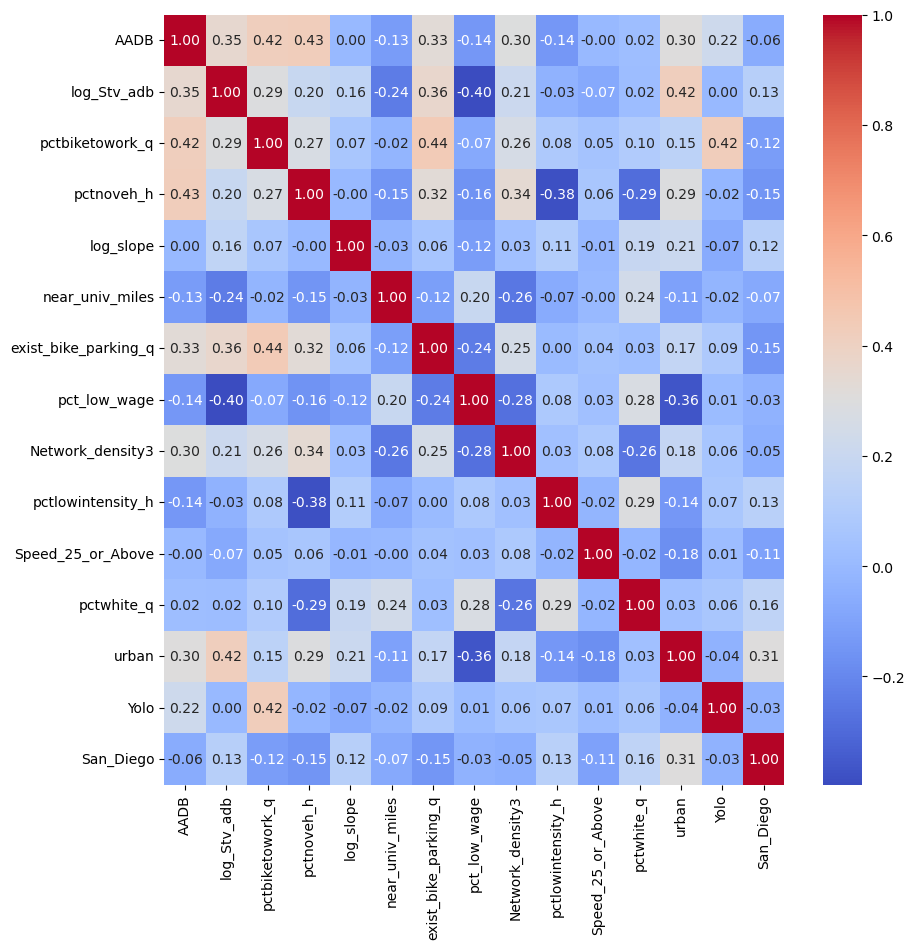

In [283]:
import seaborn as sb
plt.figure(figsize=(10,10))
corr = cor_df.corr()
sb.heatmap(corr, cmap="coolwarm", annot=True,fmt=".2f",annot_kws={"fontsize":10})

# Make some sns pair plot

In [168]:
df1=cor_df[['AADB','log_Stv_adb','pctbiketowork_q','pctnoveh_h']]

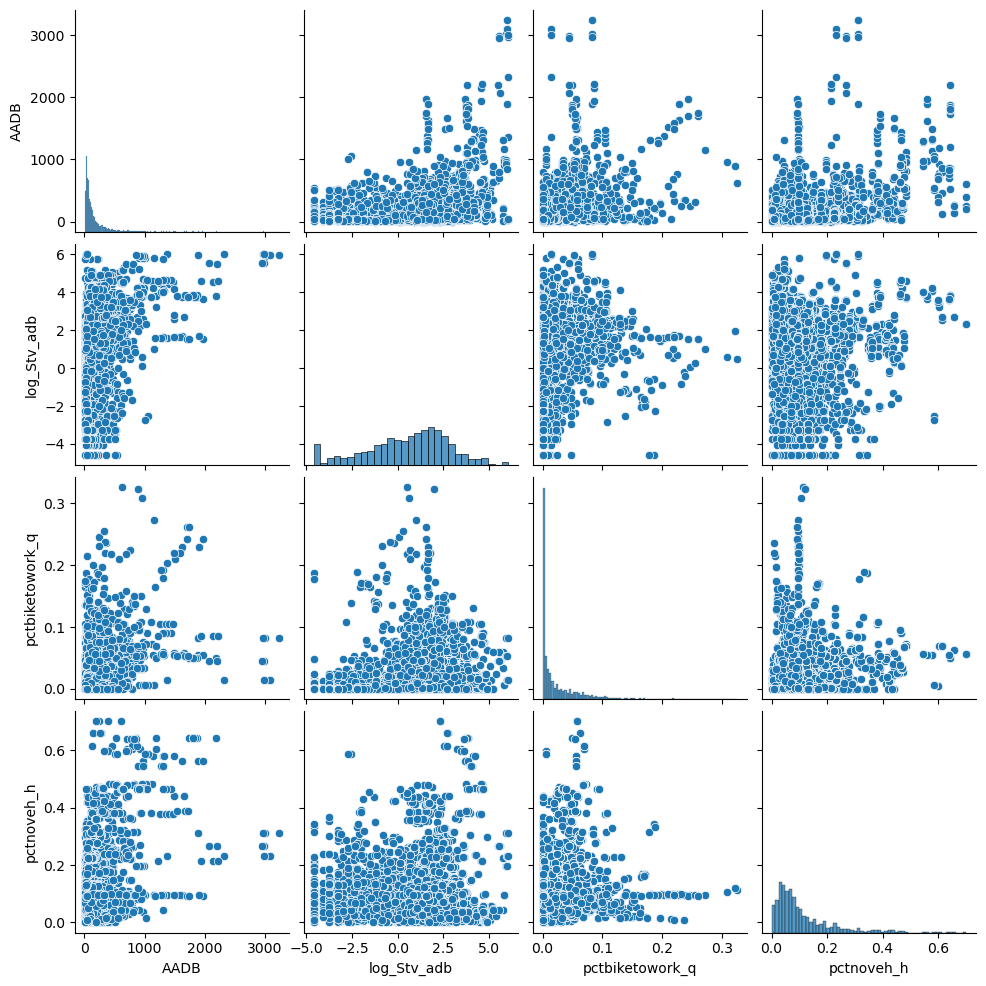

In [169]:
sns.pairplot(df1)

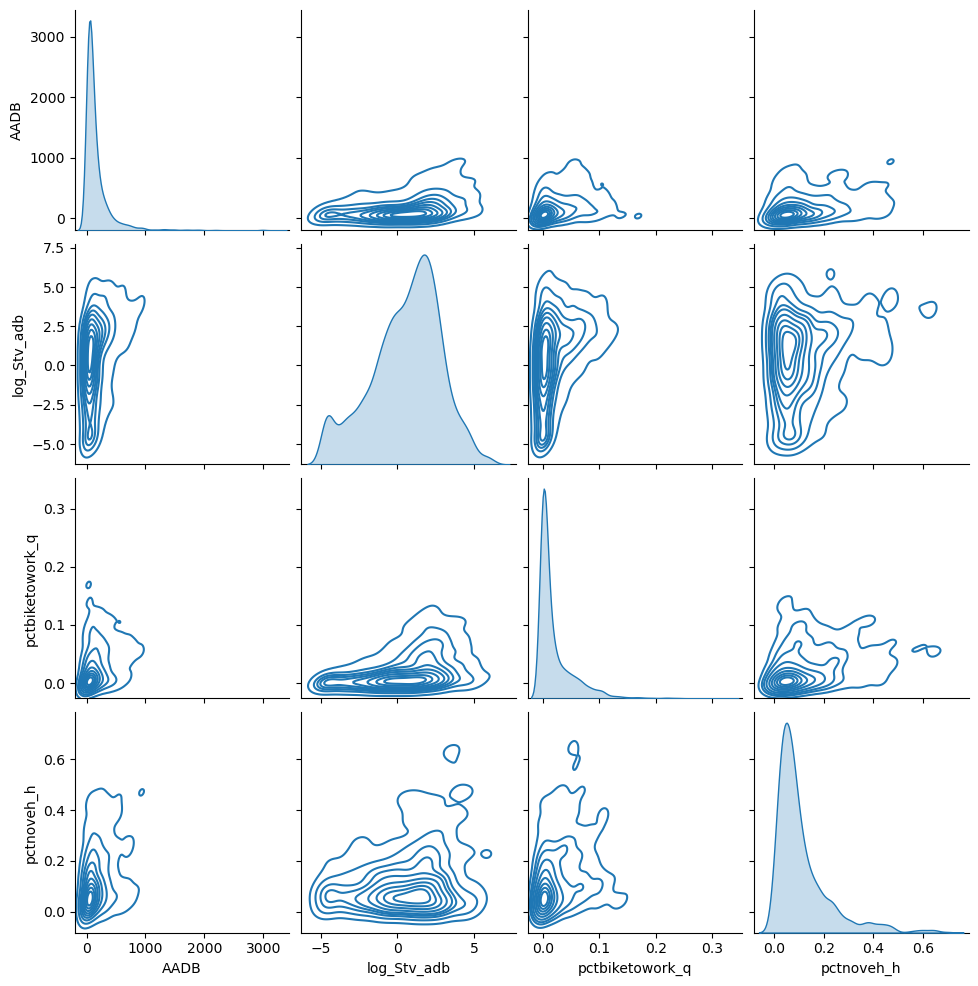

In [161]:
sns.pairplot(df1, kind="kde")

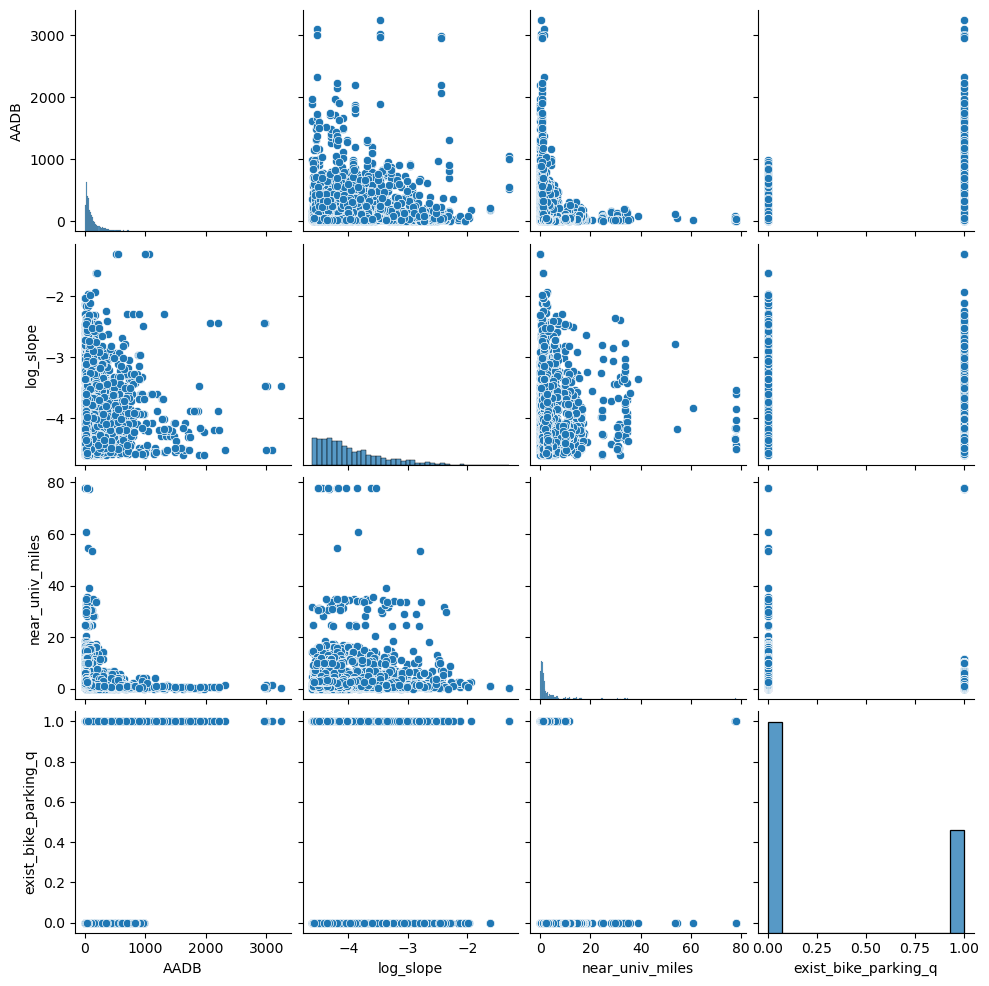

In [162]:
df2=cor_df[['AADB','log_slope','near_univ_miles','exist_bike_parking_q']]
sns.pairplot(df2)

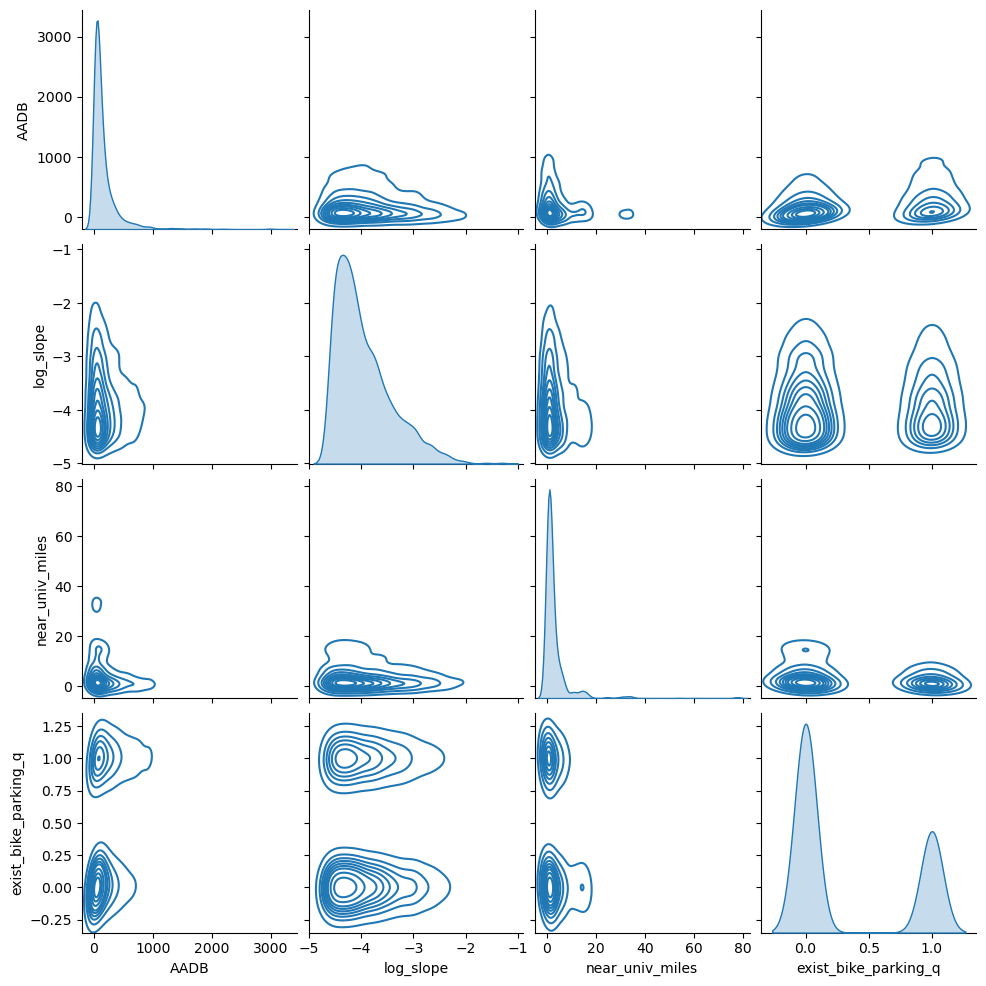

In [163]:
df2=cor_df[['AADB','log_slope','near_univ_miles','exist_bike_parking_q']]
sns.pairplot(df2, kind="kde")

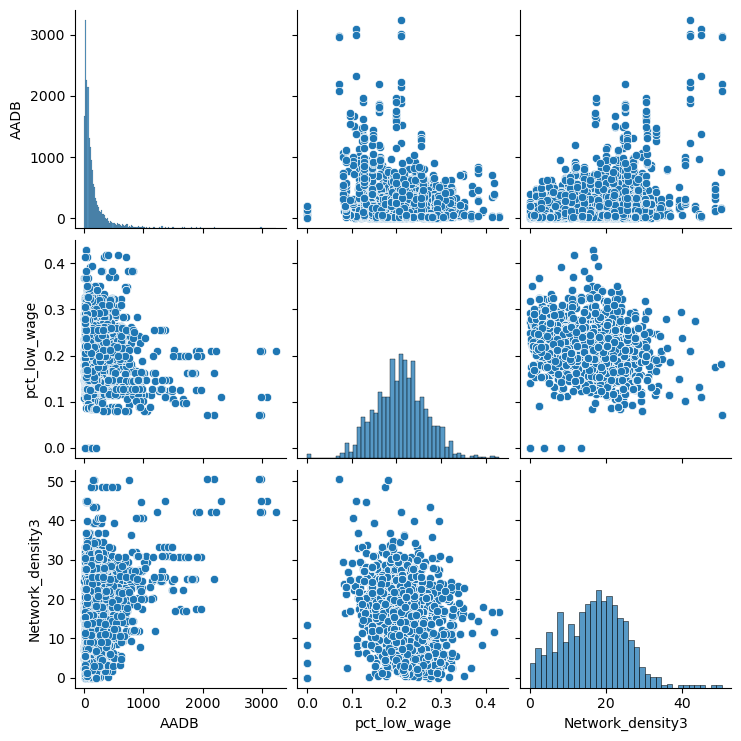

In [164]:
df3=cor_df[['AADB','pct_low_wage','Network_density3']]
sns.pairplot(df3)

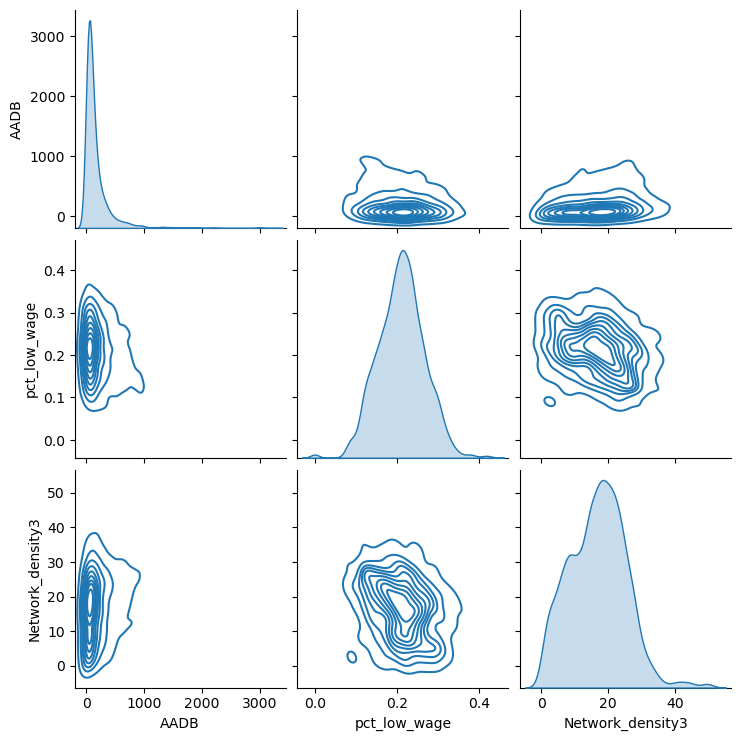

In [165]:
df3=cor_df[['AADB','pct_low_wage','Network_density3']]
sns.pairplot(df3, kind="kde")

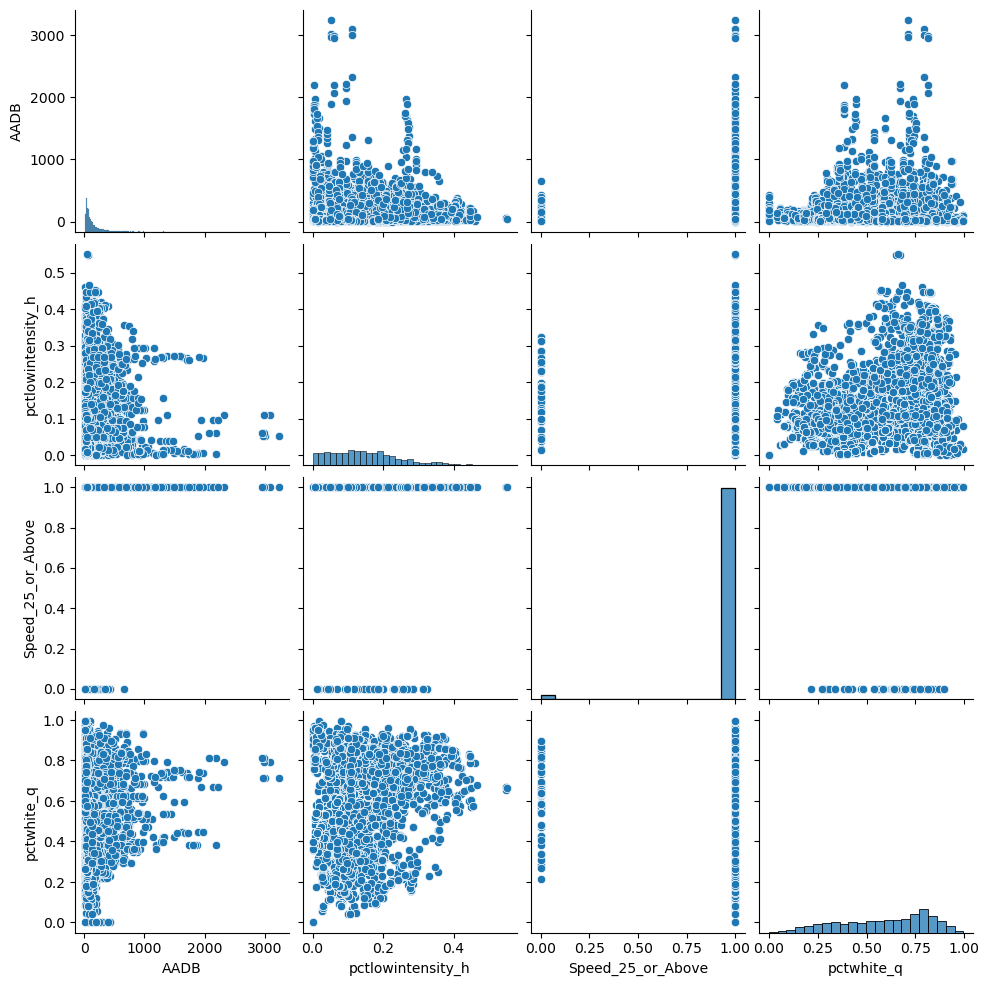

In [166]:
df4=cor_df[['AADB','pctlowintensity_h','Speed_25_or_Above','pctwhite_q']]
sns.pairplot(df4)

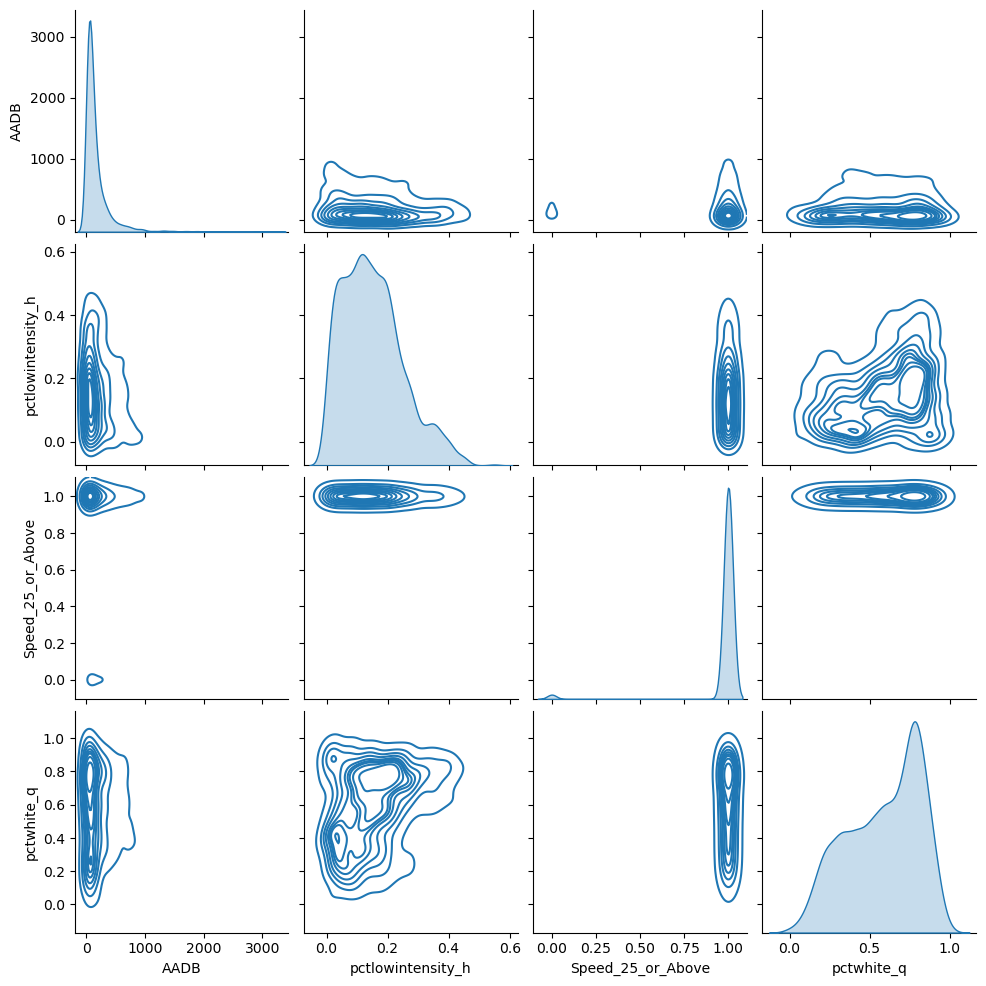

In [167]:
df4=cor_df[['AADB','pctlowintensity_h','Speed_25_or_Above','pctwhite_q']]
sns.pairplot(df4, kind="kde")

# select the Variables based on VIF<=5

In [585]:
# keep only nymeric data
data2=data1._get_numeric_data()
data2.shape, data1.shape

((4220, 199), (4220, 211))

In [586]:
list(data2.columns)

['Unnamed: 0',
 'X',
 'ID',
 'Lat',
 'Long',
 'year',
 'ATT',
 'no_of_months_data_collected',
 'AADB',
 'ATT.in.Million',
 'matched_seg_id',
 'segment_id',
 'tdg_id',
 'lrs_cal_id',
 'bikes_proh',
 'int_tdg_id',
 'loc_id',
 'seg_counter',
 'fc_draft',
 'speed',
 'slope',
 'empnum_density_t',
 'geom_length',
 'adt_amt',
 'truck_adt_amt',
 'rt_lanes_amt',
 'lt_lanes_amt',
 'rt_trav_way_width',
 'rt_i_shd_tot_width',
 'rt_o_shd_tot_width',
 'lt_trav_way_width',
 'lt_i_shd_tot_width',
 'lt_o_shd_tot_width',
 'near_strava_id',
 'empnum_density_q',
 'empnum_density_h',
 'near_univ_miles',
 'near_large_univ_miles',
 'forward_trip_count',
 'reverse_trip_count',
 'forward_commute_trip_count',
 'reverse_commute_trip_count',
 'forward_leisure_trip_count',
 'reverse_leisure_trip_count',
 'forward_average_speed',
 'reverse_average_speed',
 'index',
 'ATT.in.Thousands',
 'rowIndex',
 'primary',
 'secondary',
 'tertiary',
 'residential',
 'trunk',
 'secondary_link',
 'unclassified',
 'speed_0_25',
 '

In [587]:
data3=data2.drop(['X',
 'ID',
 'Lat',
 'Long',
 'year',
 'ATT',
 'no_of_months_data_collected','ATT.in.Million',
 'matched_seg_id',
 'segment_id',
 'tdg_id',
 'lrs_cal_id',
 'bikes_proh',
 'int_tdg_id',
 'loc_id',
 'seg_counter',
 'fc_draft','geom_length','near_strava_id','index',
 'ATT.in.Thousands',
 'rowIndex', 'speed_0_25',
 'speed_21_35','Mean',
 'std',
 'outlier','primary',
 'secondary',
 'tertiary',
 'residential',
 'trunk',
 'secondary_link',
 'unclassified','Unnamed: 0','path','adt_amt',
 'truck_adt_amt',
 'rt_i_shd_tot_width',
 'rt_o_shd_tot_width',
 'lt_i_shd_tot_width', 'forward_trip_count',
 'reverse_commute_trip_count',
 'reverse_leisure_trip_count',
 'reverse_average_speed','Freeway','dist_ferry','exist_ferry_t','exist_ferry_q','exist_ferry_h', 'bgarea_t',
 'bgcliparea_t',
 'pctofbgarea_t', 'bgarea_q',
 'bgcliparea_q',
 'pctofbgarea_q', 'bgarea_h',
 'bgcliparea_h',
 'pctofbgarea_h', 'rt_lanes_amt',
 'lt_o_shd_tot_width','rt_lanes_amt',
 'lt_o_shd_tot_width','reverse_trip_count',
 'forward_leisure_trip_count',
 'forward_average_speed','lt_lanes_amt','rt_trav_way_width','lt_trav_way_width','forward_commute_trip_count','forward_commute_trip_count', 'Stv_commute_adb',
 'Stv_leisure_adb','Stv_adb','log_Stv_commute_adb',
 'log_Stv_leisure_adb'], axis=1)

In [588]:
corrMatrix1 = data3.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADB"])>0.20]
top_corr_features

Index(['AADB', 'empnum_density_t', 'empnum_density_q', 'empnum_density_h',
       'exist_bike_parking_t', 'exist_bike_parking_q', 'exist_subway_h',
       'exist_bike_parking_h', 'pct_med_wage', 'pct_high_wage',
       'Residential_density', 'Total_road_Network_density', 'Network_density3',
       'Street_Intersection_density', 'Intersection_density1',
       'Intersection_density41', 'Intersection_density5',
       'Jobs_45min_transit_commute', 'Population_45min_transit_commute',
       'pcthighintensity_t', 'pcthighintensity_q', 'pcthighintensity_h',
       'totwhitepersqmi_t', 'pctbiketowork_t', 'totbiketoworkpersqmi_t',
       'pctatleastbachelors_t', 'totatleastbachelorspersqmi_t', 'pctnoveh_t',
       'totnovehpersqmi_t', 'popdensitysqmi_t', 'hshlddensitysqmi_t',
       'totwhitepersqmi_q', 'pctbiketowork_q', 'totbiketoworkpersqmi_q',
       'pctatleastbachelors_q', 'totatleastbachelorspersqmi_q', 'pctnoveh_q',
       'totnovehpersqmi_q', 'popdensitysqmi_q', 'hshlddensitysqmi_q',

In [589]:
data4=data3[top_corr_features]
list(data4.columns)

['AADB',
 'empnum_density_t',
 'empnum_density_q',
 'empnum_density_h',
 'exist_bike_parking_t',
 'exist_bike_parking_q',
 'exist_subway_h',
 'exist_bike_parking_h',
 'pct_med_wage',
 'pct_high_wage',
 'Residential_density',
 'Total_road_Network_density',
 'Network_density3',
 'Street_Intersection_density',
 'Intersection_density1',
 'Intersection_density41',
 'Intersection_density5',
 'Jobs_45min_transit_commute',
 'Population_45min_transit_commute',
 'pcthighintensity_t',
 'pcthighintensity_q',
 'pcthighintensity_h',
 'totwhitepersqmi_t',
 'pctbiketowork_t',
 'totbiketoworkpersqmi_t',
 'pctatleastbachelors_t',
 'totatleastbachelorspersqmi_t',
 'pctnoveh_t',
 'totnovehpersqmi_t',
 'popdensitysqmi_t',
 'hshlddensitysqmi_t',
 'totwhitepersqmi_q',
 'pctbiketowork_q',
 'totbiketoworkpersqmi_q',
 'pctatleastbachelors_q',
 'totatleastbachelorspersqmi_q',
 'pctnoveh_q',
 'totnovehpersqmi_q',
 'popdensitysqmi_q',
 'hshlddensitysqmi_q',
 'totwhitepersqmi_h',
 'pctbiketowork_h',
 'totbiketowork

In [636]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X_dataf = data4.drop("AADB", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = data4[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

CPU times: total: 33.2 s
Wall time: 28.6 s


feature       VIF
23                              Yolo  1.316415
5                     exist_subway_h  1.674168
24                       log_Stv_adb  1.886540
10             Intersection_density1  1.891444
12             Intersection_density5  2.057663
11            Intersection_density41  2.184101
21                             urban  2.252157
3               exist_bike_parking_t  2.393225
18                   pctbiketowork_h  2.520537
8                Residential_density  2.628444
1                   empnum_density_t  2.678812
14                pcthighintensity_t  2.693836
13  Population_45min_transit_commute  2.702811
6               exist_bike_parking_h  2.936876
22                     San_Francisco  2.942492
16                        pctnoveh_t  3.285008
2                   empnum_density_h  3.388302
15            totbiketoworkpersqmi_t  3.520507
7                      pct_high_wage  3.659641
4               exist_bike_parking_q  3.848558
9         Total_road_Network_density  4.294939
17                 totwhitepersqmi_h  4.351939
19             pctatleastbachelors_h  4.581261
20                 totnovehpersqmi_h  4.599250

In [637]:
vif_data.shape

(24, 2)

In [638]:
list(vif_data['feature'])

['empnum_density_t',
 'empnum_density_h',
 'exist_bike_parking_t',
 'exist_bike_parking_q',
 'exist_subway_h',
 'exist_bike_parking_h',
 'pct_high_wage',
 'Residential_density',
 'Total_road_Network_density',
 'Intersection_density1',
 'Intersection_density41',
 'Intersection_density5',
 'Population_45min_transit_commute',
 'pcthighintensity_t',
 'totbiketoworkpersqmi_t',
 'pctnoveh_t',
 'totwhitepersqmi_h',
 'pctbiketowork_h',
 'pctatleastbachelors_h',
 'totnovehpersqmi_h',
 'urban',
 'San_Francisco',
 'Yolo',
 'log_Stv_adb']

# Now select the Independent variables that have correlation less than 0.25 among them


In [592]:
data6=data[list(vif_data['feature'])]

In [671]:
data7=data2[['AADB',
 'exist_bike_parking_q',
 'exist_subway_h',
 'Intersection_density5',
 'pctnoveh_t',
 'pctbiketowork_h',
 'urban',
 'Yolo',
 'log_Stv_adb']]

<AxesSubplot: >

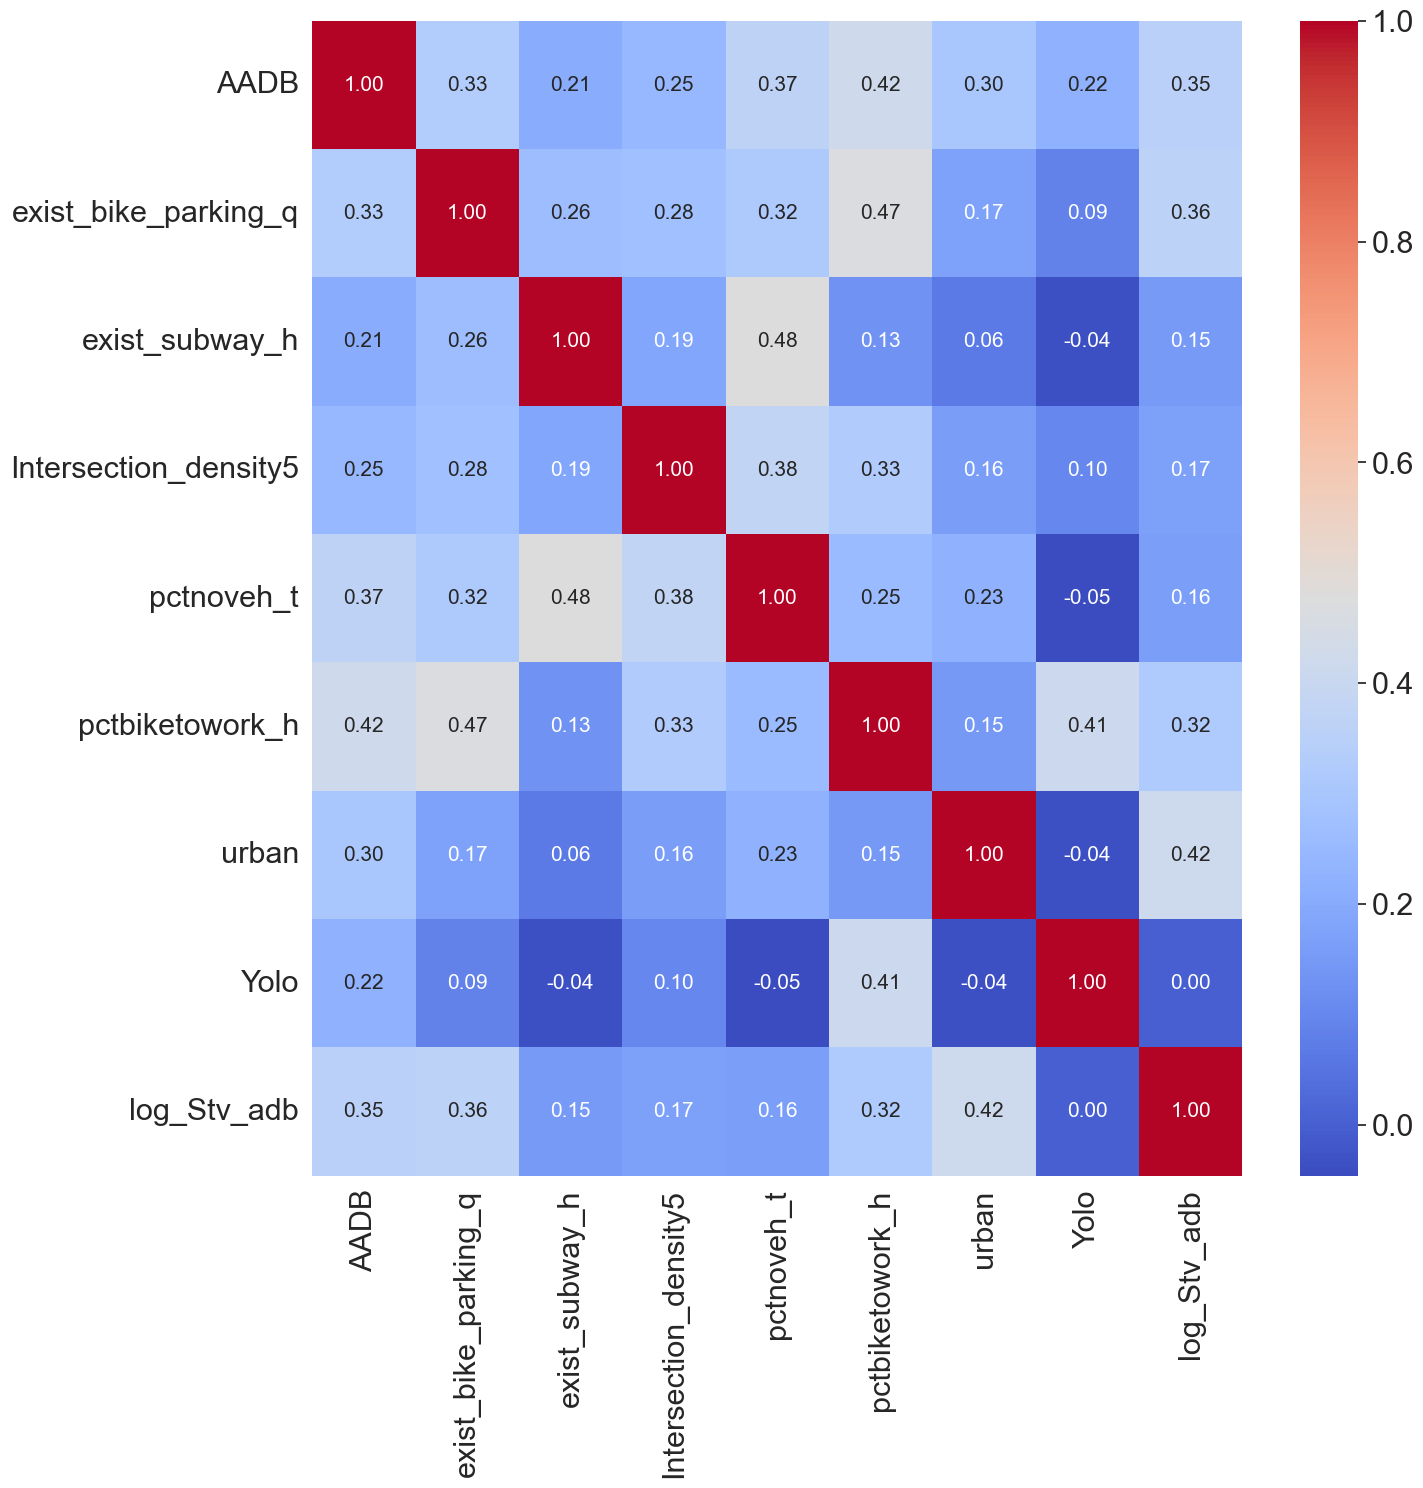

In [676]:
# Allow the mutual correlation upto 0.50
import seaborn as sb
plt.figure(figsize=(15,15))
corr = data7.corr()
sb.heatmap(corr, cmap="coolwarm", annot=True,fmt=".2f",annot_kws={"fontsize":15})

In [686]:
data8=data2[['AADB',
 'pctnoveh_t',
 'urban',
 'Yolo'
]]

<AxesSubplot: >

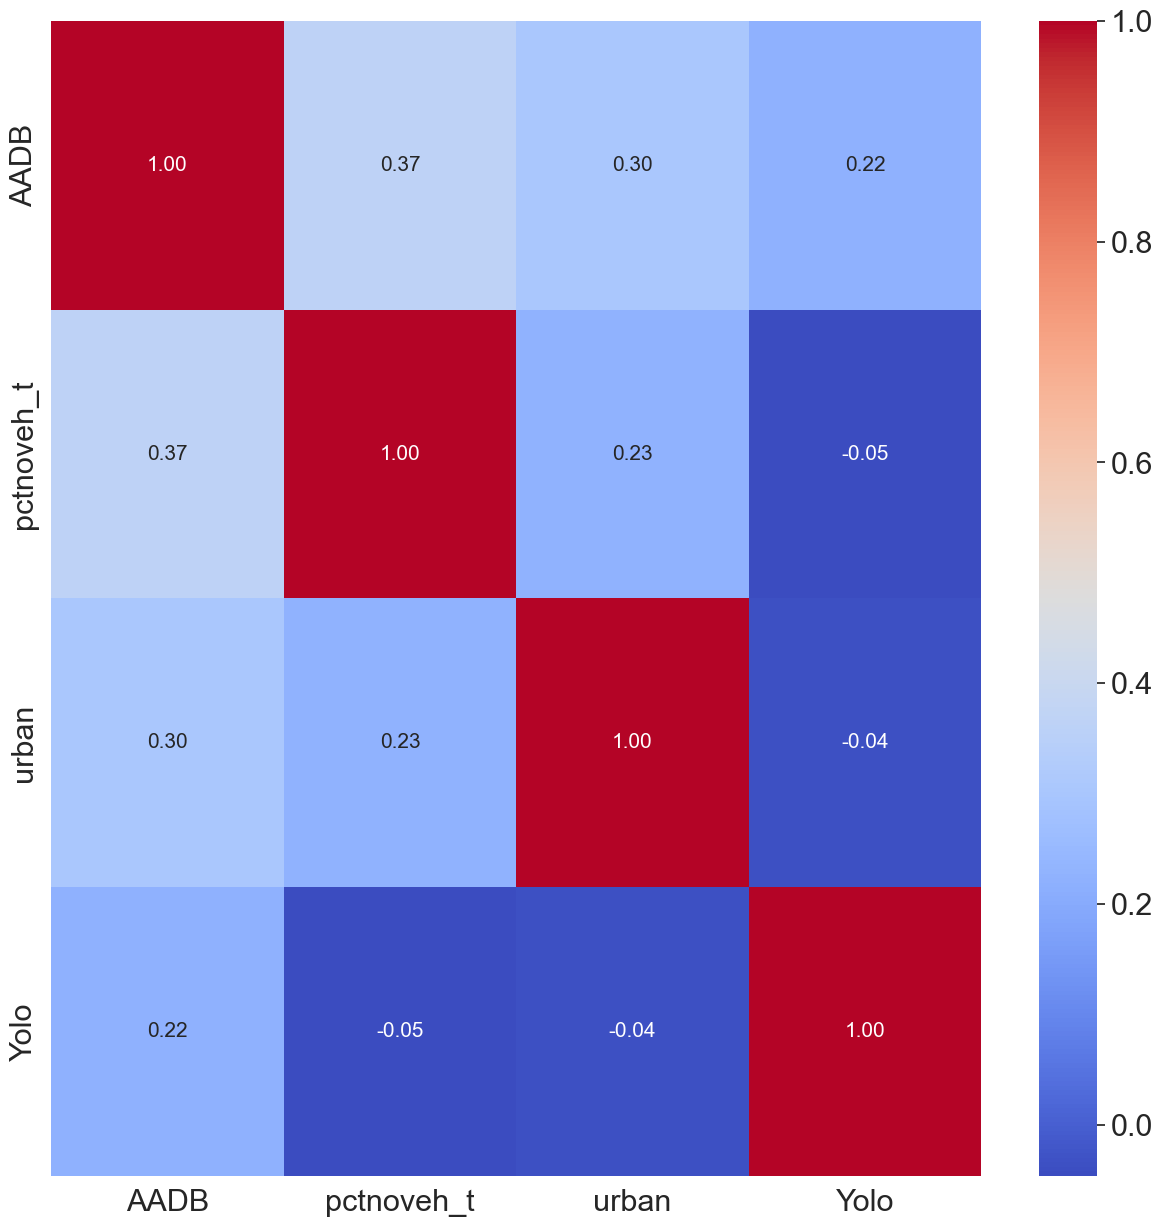

In [687]:
# Allow the mutual correlation upto 0.25
import seaborn as sb
plt.figure(figsize=(15,15))
corr1 = data8.corr()
sb.heatmap(corr1, cmap="coolwarm", annot=True,fmt=".2f",annot_kws={"fontsize":15})

<AxesSubplot: >

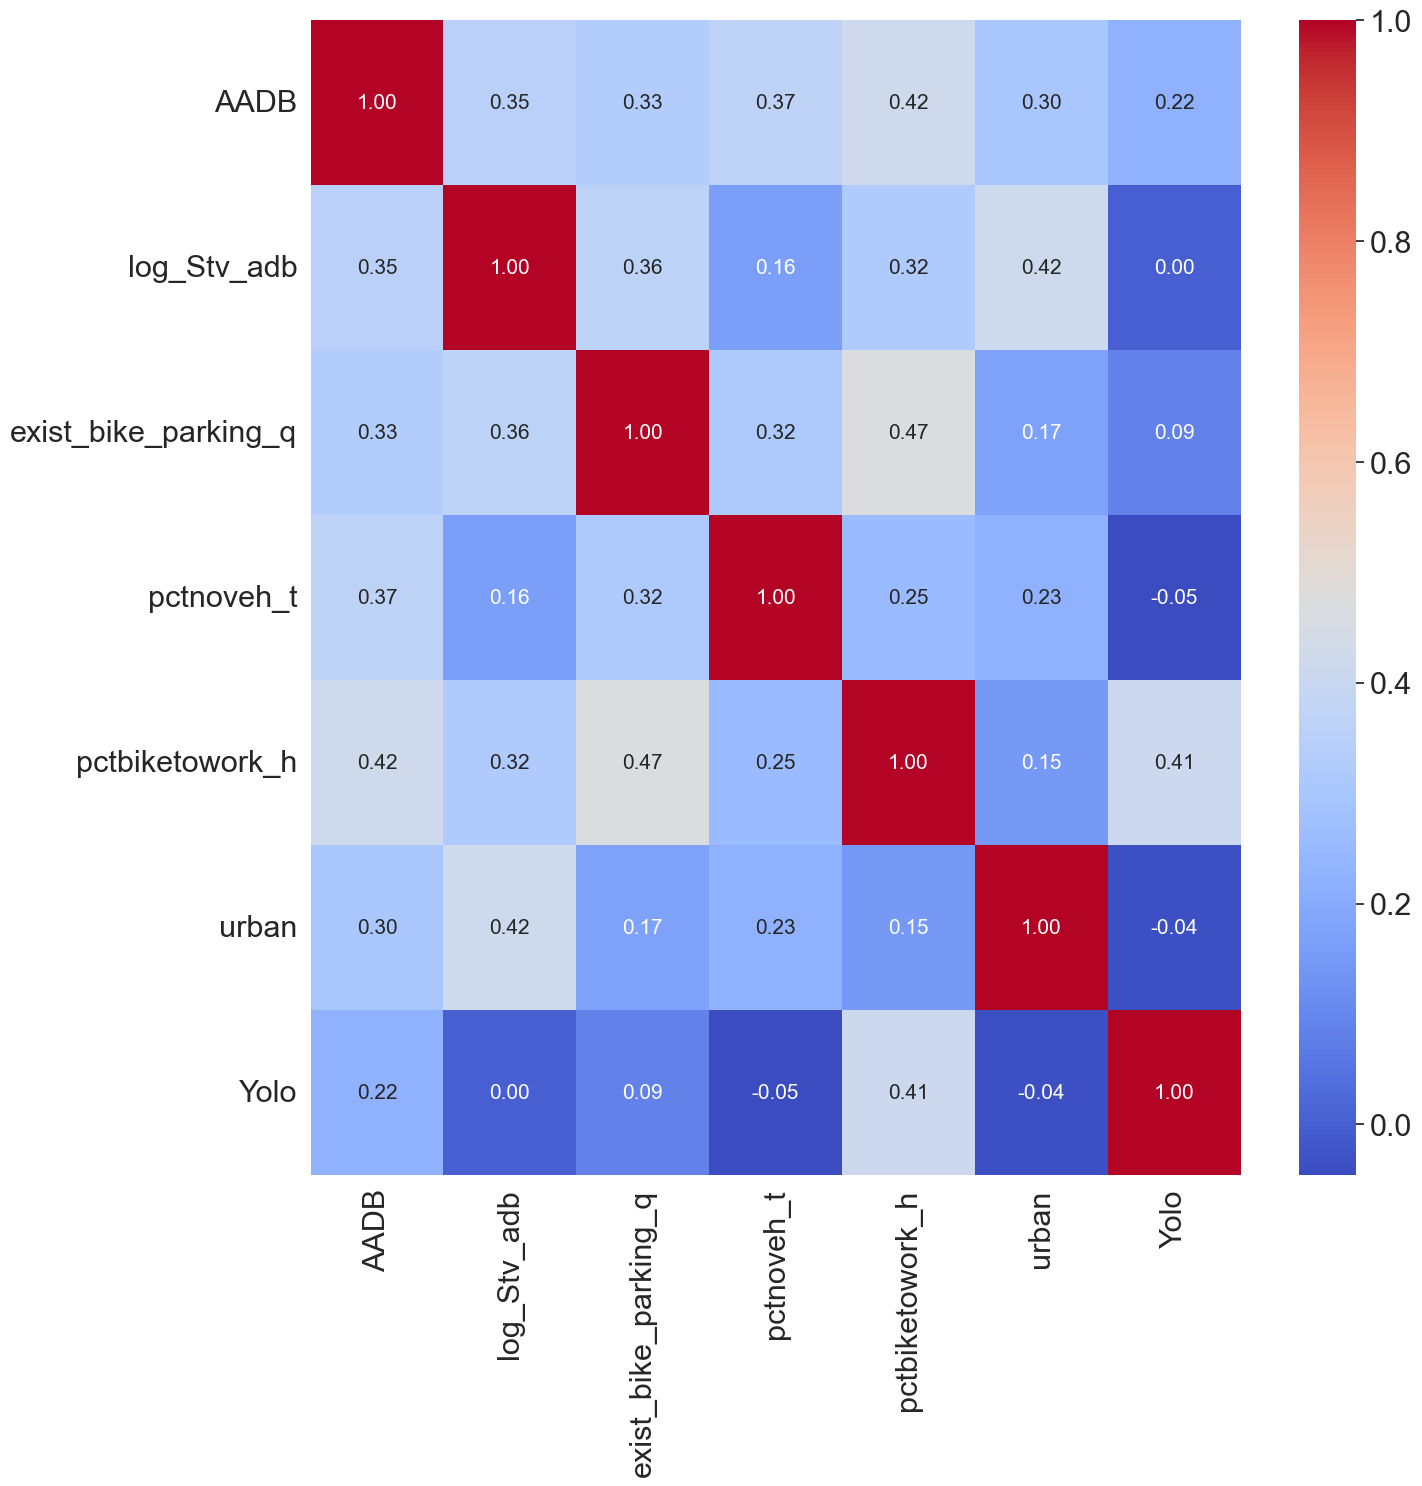

In [730]:
# Allow the mutual correlation upto 0.25
d=data1[['AADB','log_Stv_adb','exist_bike_parking_q','pctnoveh_t','pctbiketowork_h','urban','Yolo']]
import seaborn as sb
plt.figure(figsize=(15,15))
corr1 = d.corr()
sb.heatmap(corr1, cmap="coolwarm", annot=True,fmt=".2f",annot_kws={"fontsize":15})

In [720]:
# corrMatrix2 = data6.corr().abs()
# m = corrMatrix2.le(.25)
# corrMatrix3=corrMatrix2.loc[m.any(axis=1), m.any()]
# corrMatrix3

In [598]:
#m

In [795]:
formula_str='AADB ~log_Stv_adb+exist_bike_parking_q+urban+pctnoveh_t+pctbiketowork_h+Yolo'
#formula_str='AADB ~pctnoveh_t+urban+Yolo'

In [796]:
 pd.Series(pd.qcut(data5.AADB,3).value_counts())

(0.999, 51.0]      1422
(51.0, 137.0]      1404
(137.0, 3243.0]    1394
Name: AADB, dtype: int64

In [797]:
low=data5.loc[data5['AADB']<=100]
mid=data5[(data5['AADB']>100) & (data5['AADB']<=300)]
high=data5.loc[data5['AADB']>300]
low.shape, mid.shape, high.shape

((2392, 25), (1227, 25), (601, 25))

In [798]:
# Now we do 10fold cv for our NB:
NB_df=data5
num_folds = 10

kfold = KFold(n_splits=10, shuffle=True, random_state=94706)

# Now we perform KFold:

fold_num = 1
nb_MAPE_train = []
nb_MAPE_scores = []
nb_RMSE_train = []
nb_RMSE_scores = []
nb_MAE_train = []
nb_MAE_scores = []
nb_R2_train = []
nb_R2_scores = []

nb_low_MAPE_scores = []
nb_low_RMSE_scores = []
nb_low_MAE_scores = []
nb_low_R2_scores = []

nb_med_MAPE_scores = []
nb_med_RMSE_scores = []
nb_med_MAE_scores = []
nb_med_R2_scores = []

nb_high_MAPE_scores = []
nb_high_RMSE_scores = []
nb_high_MAE_scores = []
nb_high_R2_scores = []
test_pred = []

# we split the entire dataframe:
for train, test in kfold.split(NB_df):
    NB_CV_model = smf.glm(
        formula_str, data=NB_df.iloc[train], family=sm.families.Poisson()).fit(cov_type='HC3', use_t=True)

    train_predictions = NB_CV_model.predict(NB_df.iloc[train])
    test_predictions = NB_CV_model.predict(NB_df.iloc[test])
    train_mae = mean_absolute_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAE_scores.append(test_mae)
    train_rmse = math.sqrt(mean_squared_error(NB_df.iloc[train]['AADB'], train_predictions))
    nb_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'], test_predictions))
    nb_RMSE_scores.append(test_rmse)
    train_mape = mean_absolute_percentage_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAPE_scores.append(test_mape)
    train_r2 = r2_score(NB_df.iloc[train]['AADB'], train_predictions)
    nb_R2_train.append(train_r2)
    score_r2 = r2_score(NB_df.iloc[test]['AADB'], test_predictions)
    nb_R2_scores.append(score_r2)
    
        # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 0, NB_df.iloc[test]['AADB'] <=100], axis=0)
    med_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 101, NB_df.iloc[test]['AADB'] <=300], axis=0)
    high_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 301],axis=0)
   
    nb_low_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask]))))
    nb_low_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))

    nb_med_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask]))))
    nb_med_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))

    nb_high_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask]))))
    nb_high_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={NB_df.iloc[test][low_Y_test_mask].shape[0]}), MED (n={NB_df.iloc[test][med_Y_test_mask].shape[0]}), HIGH (n={NB_df.iloc[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {nb_low_MAE_scores[-1]}\tMed Loss: {nb_med_MAE_scores[-1]}\tHigh Loss: {nb_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {nb_low_RMSE_scores[-1]}\tMed RMSE: {nb_med_RMSE_scores[-1]}\tHigh RMSE: {nb_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {nb_low_MAPE_scores[-1]}\tMed MAPE: {nb_med_MAPE_scores[-1]}\tHigh MAPE: {nb_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {nb_low_R2_scores[-1]}\tMed R2: {nb_med_R2_scores[-1]}\tHigh R2: {nb_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(nb_low_MAE_scores)} +/- {np.std(nb_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(nb_low_RMSE_scores)} +/- {np.std(nb_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(nb_low_MAPE_scores)} +/- {np.std(nb_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(nb_low_R2_scores)} +/- {np.std(nb_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(nb_med_MAE_scores)} +/- {np.std(nb_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(nb_med_RMSE_scores)} +/- {np.std(nb_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(nb_med_MAPE_scores)} +/- {np.std(nb_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(nb_med_R2_scores)} +/- {np.std(nb_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(nb_high_MAE_scores)} +/- {np.std(nb_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(nb_high_RMSE_scores)} +/- {np.std(nb_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(nb_high_MAPE_scores)} +/- {np.std(nb_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(nb_high_R2_scores)} +/- {np.std(nb_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(nb_MAE_scores)} +/- {np.std(nb_MAE_scores)}")
print(f"Overall RMSE: {np.mean(nb_RMSE_scores)} +/- {np.std(nb_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(nb_MAPE_scores)} +/- {np.std(nb_MAPE_scores)}")
print(f"Overall R2: {np.mean(nb_R2_scores)} +/- {np.std(nb_R2_scores)}\n\n")


print("Delimited table for Negative Binomial Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (nb_MAPE_train[i], nb_MAPE_scores[i], nb_RMSE_train[i], nb_RMSE_scores[i], nb_MAE_train[i], nb_MAE_scores[i], nb_R2_train[i], nb_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(nb_MAPE_train), np.mean(nb_MAPE_scores), np.mean(nb_RMSE_train),
      np.mean(nb_RMSE_scores), np.mean(nb_MAE_train), np.mean(nb_MAE_scores), np.mean(nb_R2_train), np.mean(nb_R2_scores)))     

------------------------------------------Fold 1------------------------------------------
	Train MAE: 111.14465218035528	Score Loss: 100.3073237674348
	Train RMSE: 205.08002297126959	Score RMSE: 161.56313396328434
	Train MAPE: 188.997966275326	Score MAPE: 197.98730201466356
	Train R2:   0.4331477869048018	Score R2: 0.49051688804834326

	3-VOLUME SCORES: LOW (n=236), MED (n=133), HIGH (n=53), TOTAL IN FOLD (n=422)
	Low Loss: 69.53718612393348	Med Loss: 83.43175335464228	High Loss: 279.6696511026746
	Low RMSE: 96.73060119373108	Med RMSE: 117.69778293370226	High RMSE: 362.5041727496068
	Low MAPE: 314.11701321457537	Med MAPE: 53.13966951710803	High MAPE: 44.36698652401631
	Low R2:   -13.450513515968057	Med R2: -3.625461553118819	High R2: -3.625461553118819
------------------------------------------Fold 2------------------------------------------
	Train MAE: 109.01158616730167	Score Loss: 114.08325239810034
	Train RMSE: 199.2963574156522	Score RMSE: 213.74665388057002
	Train MAPE: 186.1651

In [800]:
NB_CV_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   AADB   No. Observations:                 3798
Model:                            GLM   Df Residuals:                     3791
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.3776e+05
Date:                Tue, 12 Sep 2023   Deviance:                   4.5163e+05
Time:                        17:17:13   Pearson chi2:                 6.01e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.2846      0.027    161.254      0.000       4.233       4.337
log_Stv_adb              0.1876      0.016     11.575      0.000       0.156       0.219
exist_bike_parking_q     0.2193      0.043      5.098      0.000       0.135       0.304
urban                    0.1894      0.054      3.498      0.000       0.083       0.296
pctnoveh_t               1.8172      0.135     13.433      0.000       1.552       2.082
pctbiketowork_h          6.2135      0.620     10.016      0.000       4.997       7.430
Yolo                     0.8177      0.140      5.847      0.000       0.544       1.092
========================================================================================
"""

# Run NB Model

In [801]:
formula_str='AADB~exist_bike_parking_q+pctnoveh_t+pctbiketowork_h+urban+log_Stv_adb'

In [803]:
# Now we do 10fold cv for our NB:
NB_df=data1
num_folds = 10

kfold = KFold(n_splits=10, shuffle=True, random_state=94704)

# Now we perform KFold:

fold_num = 1
nb_MAPE_train = []
nb_MAPE_scores = []
nb_RMSE_train = []
nb_RMSE_scores = []
nb_MAE_train = []
nb_MAE_scores = []
nb_R2_train = []
nb_R2_scores = []

nb_low_MAPE_scores = []
nb_low_RMSE_scores = []
nb_low_MAE_scores = []
nb_low_R2_scores = []

nb_med_MAPE_scores = []
nb_med_RMSE_scores = []
nb_med_MAE_scores = []
nb_med_R2_scores = []

nb_high_MAPE_scores = []
nb_high_RMSE_scores = []
nb_high_MAE_scores = []
nb_high_R2_scores = []
test_pred = []

# we split the entire dataframe:
for train, test in kfold.split(NB_df):
    NB_CV_model = smf.glm(
        formula_str, data=NB_df.iloc[train], family=sm.families.NegativeBinomial()).fit(cov_type='HC3', use_t=True)

    train_predictions = NB_CV_model.predict(NB_df.iloc[train])
    test_predictions = NB_CV_model.predict(NB_df.iloc[test])
    train_mae = mean_absolute_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAE_scores.append(test_mae)
    train_rmse = math.sqrt(mean_squared_error(NB_df.iloc[train]['AADB'], train_predictions))
    nb_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'], test_predictions))
    nb_RMSE_scores.append(test_rmse)
    train_mape = mean_absolute_percentage_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAPE_scores.append(test_mape)
    train_r2 = r2_score(NB_df.iloc[train]['AADB'], train_predictions)
    nb_R2_train.append(train_r2)
    score_r2 = r2_score(NB_df.iloc[test]['AADB'], test_predictions)
    nb_R2_scores.append(score_r2)
    
        # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 0, NB_df.iloc[test]['AADB'] <=100], axis=0)
    med_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 101, NB_df.iloc[test]['AADB'] <=300], axis=0)
    high_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 301],axis=0)
   
    nb_low_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask]))))
    nb_low_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))

    nb_med_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask]))))
    nb_med_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))

    nb_high_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask]))))
    nb_high_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={NB_df.iloc[test][low_Y_test_mask].shape[0]}), MED (n={NB_df.iloc[test][med_Y_test_mask].shape[0]}), HIGH (n={NB_df.iloc[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {nb_low_MAE_scores[-1]}\tMed Loss: {nb_med_MAE_scores[-1]}\tHigh Loss: {nb_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {nb_low_RMSE_scores[-1]}\tMed RMSE: {nb_med_RMSE_scores[-1]}\tHigh RMSE: {nb_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {nb_low_MAPE_scores[-1]}\tMed MAPE: {nb_med_MAPE_scores[-1]}\tHigh MAPE: {nb_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {nb_low_R2_scores[-1]}\tMed R2: {nb_med_R2_scores[-1]}\tHigh R2: {nb_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(nb_low_MAE_scores)} +/- {np.std(nb_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(nb_low_RMSE_scores)} +/- {np.std(nb_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(nb_low_MAPE_scores)} +/- {np.std(nb_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(nb_low_R2_scores)} +/- {np.std(nb_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(nb_med_MAE_scores)} +/- {np.std(nb_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(nb_med_RMSE_scores)} +/- {np.std(nb_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(nb_med_MAPE_scores)} +/- {np.std(nb_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(nb_med_R2_scores)} +/- {np.std(nb_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(nb_high_MAE_scores)} +/- {np.std(nb_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(nb_high_RMSE_scores)} +/- {np.std(nb_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(nb_high_MAPE_scores)} +/- {np.std(nb_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(nb_high_R2_scores)} +/- {np.std(nb_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(nb_MAE_scores)} +/- {np.std(nb_MAE_scores)}")
print(f"Overall RMSE: {np.mean(nb_RMSE_scores)} +/- {np.std(nb_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(nb_MAPE_scores)} +/- {np.std(nb_MAPE_scores)}")
print(f"Overall R2: {np.mean(nb_R2_scores)} +/- {np.std(nb_R2_scores)}\n\n")


print("Delimited table for Negative Binomial Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (nb_MAPE_train[i], nb_MAPE_scores[i], nb_RMSE_train[i], nb_RMSE_scores[i], nb_MAE_train[i], nb_MAE_scores[i], nb_R2_train[i], nb_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(nb_MAPE_train), np.mean(nb_MAPE_scores), np.mean(nb_RMSE_train),
      np.mean(nb_RMSE_scores), np.mean(nb_MAE_train), np.mean(nb_MAE_scores), np.mean(nb_R2_train), np.mean(nb_R2_scores))) 

------------------------------------------Fold 1------------------------------------------
	Train MAE: 113.68395309355601	Score Loss: 116.01733581381649
	Train RMSE: 209.75483105437436	Score RMSE: 247.3442326004282
	Train MAPE: 200.8003587871952	Score MAPE: 194.16259221569715
	Train R2:   0.38806048368055424	Score R2: 0.14591041791380233

	3-VOLUME SCORES: LOW (n=250), MED (n=122), HIGH (n=50), TOTAL IN FOLD (n=422)
	Low Loss: 74.20469754580995	Med Loss: 97.05280168652705	High Loss: 371.3539904244355
	Low RMSE: 105.64206032016658	Med RMSE: 154.25843848314565	High RMSE: 634.4206337603343
	Low MAPE: 286.5618319066916	Med MAPE: 63.527742071415325	High MAPE: 50.915428112772446
	Low R2:   -17.031560996707682	Med R2: -9.41445954946153	High R2: -9.41445954946153
------------------------------------------Fold 2------------------------------------------
	Train MAE: 111.90144705586891	Score Loss: 123.565295238024
	Train RMSE: 210.44605156192188	Score RMSE: 238.87152606277007
	Train MAPE: 192.467

In [804]:
NB_CV_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   AADB   No. Observations:                 3798
Model:                            GLM   Df Residuals:                     3792
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22276.
Date:                Tue, 12 Sep 2023   Deviance:                       3123.4
Time:                        17:20:07   Pearson chi2:                 3.89e+03
No. Iterations:                    12   Pseudo R-squ. (CS):             0.3939
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.3013      0.024    181.750      0.000       4.255       4.348
exist_bike_parking_q     0.1663      0.041      4.043      0.000       0.086       0.247
pctnoveh_t               1.8070      0.123     14.749      0.000       1.567       2.047
pctbiketowork_h          9.3377      0.558     16.740      0.000       8.244      10.431
urban                    0.3813      0.061      6.275      0.000       0.262       0.500
log_Stv_adb              0.0824      0.009      9.601      0.000       0.066       0.099
========================================================================================
"""

# Run the Random Forest with the same set of Variables

In [805]:
model_data=data1[['AADB',
 'exist_bike_parking_q',
 'exist_subway_h',
 'Intersection_density5',
 'pctnoveh_t',
 'pctbiketowork_h',
 'urban',
 'Yolo',
 'log_Stv_adb']]

In [806]:
track=data[['tdg_id','Leg','county', 'year','AADB']]
track['index']=track.index
track.head()

tdg_id  Leg   county  year  AADB  index
0  208578  NaN  Alameda  2018    31      0
1  221803  NaN  Alameda  2019    35      1
2  221803  NaN  Alameda  2019    67      2
3  214389  NaN  Alameda  2017   191      3
4  214389  NaN  Alameda  2018   214      4

In [807]:
# split data into X dataframe and Y dataframe:
X_data = model_data.drop("AADB", axis=1)
Y_data = model_data["AADB"]
print(f"X_data.shape: {X_data.shape} Y_data.shape: {Y_data.shape}")
features = model_data.drop("AADB", axis=1)
feature_list = list(features.columns)
X = np.asarray(X_data)
Y = np.asarray(Y_data)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=94704)

X_data.shape: (4220, 8) Y_data.shape: (4220,)


In [752]:
# find best hyper parameter
from hyperopt import fmin, tpe, hp, anneal, Trials
random_state=94704
n_iter=500
num_folds=10
kf = KFold(n_splits=num_folds)

def rf_mse_cv(params, random_state=random_state, cv=kf, X=X, Y=Y):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'min_samples_leaf':int(params['min_samples_leaf']),
             'min_samples_split':int(params['min_samples_split'])
             }
    
    # we use this params to create a new RF Regressor
    model = RandomForestRegressor(random_state=random_state, **params)
    score = -cross_val_score(model, X, Y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1,error_score='raise').mean()

    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',50,2000),
           'max_depth':hp.uniform('max_depth',2,150),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,12)}
    best=fmin(fn=rf_mse_cv,space=params,algo=tpe.suggest,trials=trial,max_evals=n_iter,rstate=np.random.default_rng(random_state))
    return best

trial=Trials()
best=optimize(trial)

100%|████████████████████████████████████████████| 500/500 [3:43:19<00:00, 26.80s/trial, best loss: 42754.406117710074]


In [764]:
print(best)

{'max_depth': 13.364629000005356, 'min_samples_leaf': 2.7150729222998384, 'min_samples_split': 3.884153747313602, 'n_estimators': 1690.116719134125}


In [765]:
TID=[t['tid'] for t in trial.trials]
Loss=[t['result']['loss'] for t in trial.trials]
maxd=[t['misc']['vals']['max_depth'][0] for t in trial.trials]
nest=[t['misc']['vals']['n_estimators'][0] for t in trial.trials]
min_ss=[t['misc']['vals']['min_samples_split'][0] for t in trial.trials]
min_sl=[t['misc']['vals']['min_samples_leaf'][0] for t in trial.trials]

hyperopt_rfr=pd.DataFrame({'tid':TID,'loss':Loss,
                          'max_depth':maxd,'n_estimators':nest,
                          'min_samples_split':min_ss, 'min_samples_leaf':min_sl})
hyperopt_rfr['RMSE']=np.sqrt(hyperopt_rfr['loss'])

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

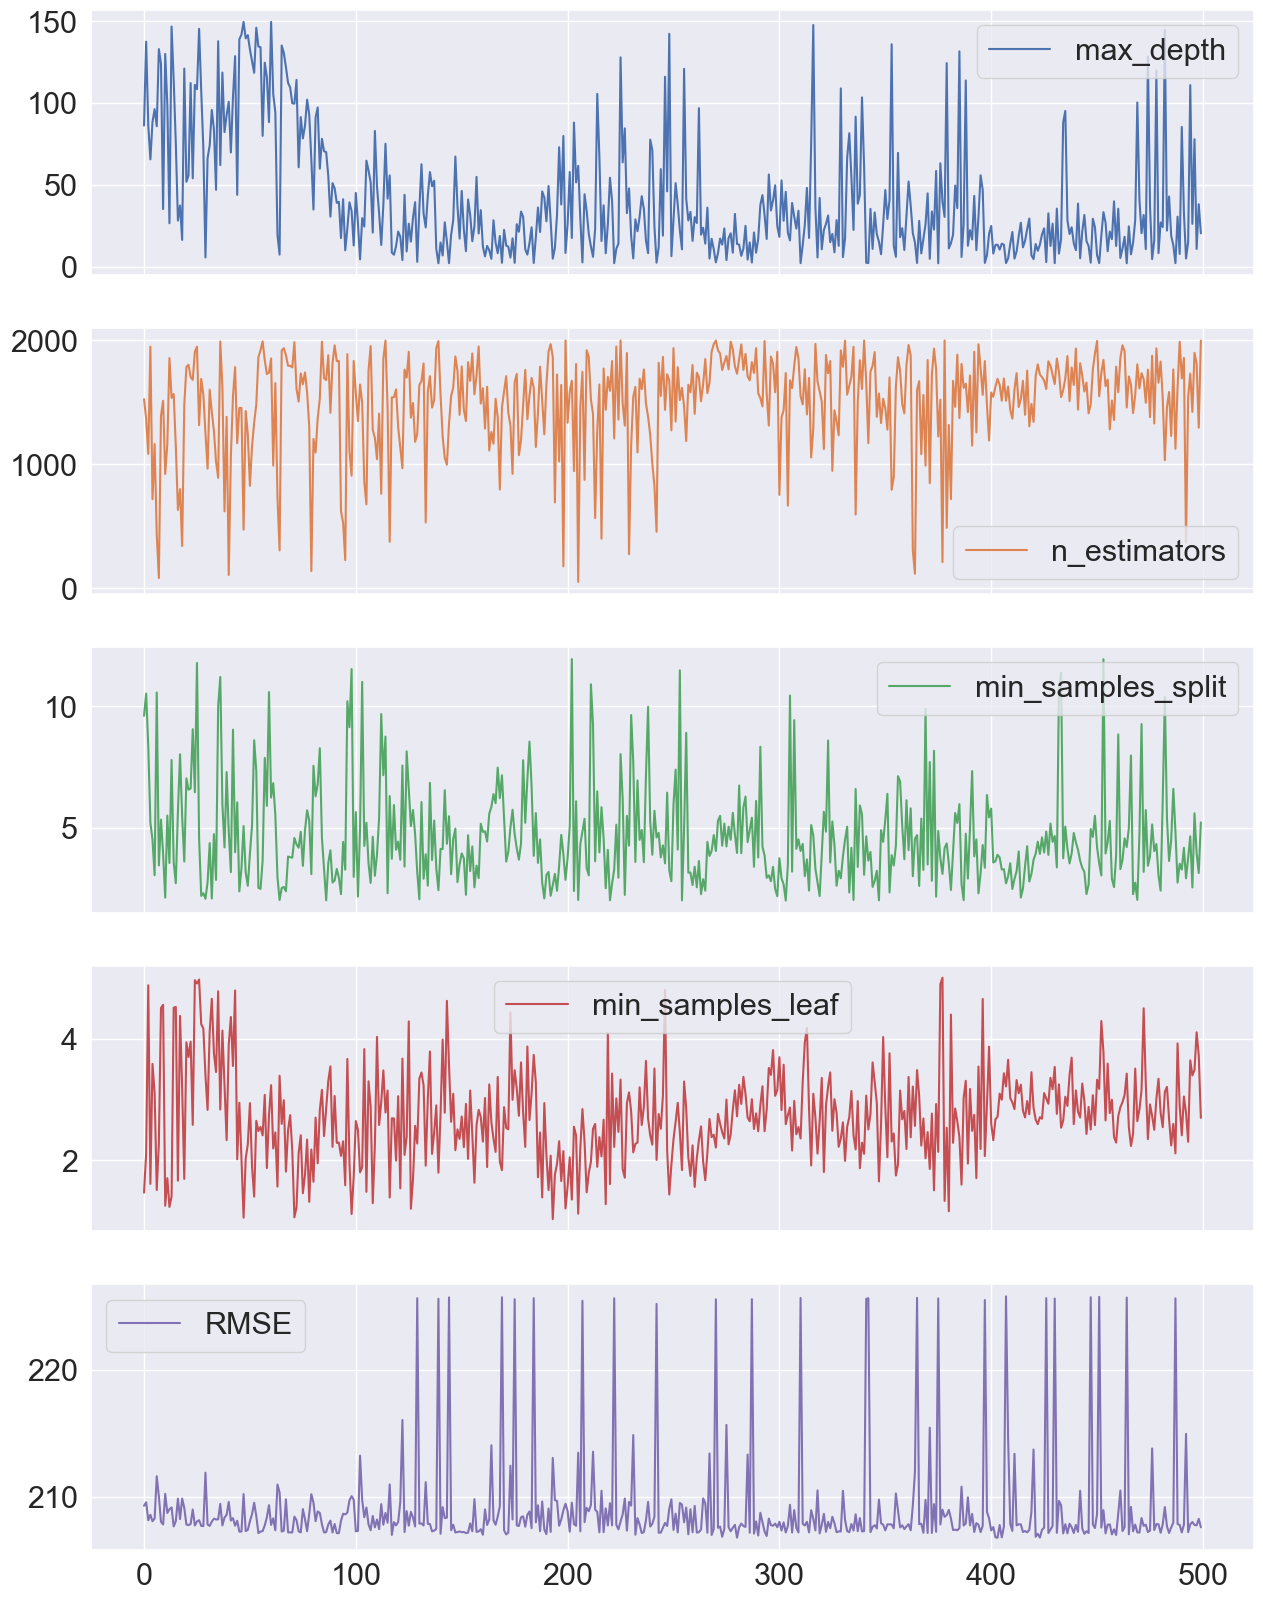

In [766]:
hyperopt_rfr[[
 'max_depth',
 'n_estimators',
 'min_samples_split',
 'min_samples_leaf',
 'RMSE']].plot(subplots=True,figsize=(15, 20))

In [767]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer

class regressor_stratified_cv:
    def __init__(self,n_splits=10,n_repeats=1,group_count=10,random_state=37914,strategy='quantile'):
        self.group_count=group_count
        self.strategy=strategy
        self.cvkwargs=dict(n_splits=n_splits,n_repeats=n_repeats,random_state=random_state)
        self.cv=RepeatedStratifiedKFold(**self.cvkwargs)
        self.discretizer=KBinsDiscretizer(n_bins=self.group_count,encode='ordinal',strategy=self.strategy)  
            
    def split(self,X,y,groups=None):
        kgroups=self.discretizer.fit_transform(y[:,None])[:,0]
        return self.cv.split(X,kgroups,groups)
    
    def get_n_splits(self,X,y,groups=None):
        return self.cv.get_n_splits(X,y,groups)

In [808]:
import warnings
warnings.filterwarnings('ignore')
# Lets breakdown this results by volume bin
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_strategies.html
# Now we do 10fold cv for our NB:
#num_folds = 10
n_splits=10
n_repeats=1
group_count=10
kfold = regressor_stratified_cv(n_splits=n_splits,n_repeats=n_repeats,
        group_count=group_count,random_state=94704,strategy='quantile') #another option uniform

# Now we perform KFold:

fold_num = 1
rf_MAPE_train = []
rf_MAPE_scores = []
rf_RMSE_train = []
rf_RMSE_scores = []
rf_MAE_train = []
rf_MAE_scores = []
rf_R2_train = []
rf_R2_scores = []

rf_low_MAPE_scores = []
rf_low_RMSE_scores = []
rf_low_MAE_scores = []
rf_low_R2_scores = []

rf_med_MAPE_scores = []
rf_med_RMSE_scores = []
rf_med_MAE_scores = []
rf_med_R2_scores = []

rf_high_MAPE_scores = []
rf_high_RMSE_scores = []
rf_high_MAE_scores = []
rf_high_R2_scores = []
test_pred = []



# we split the entire dataframe:
for train, test in kfold.split(X_data, Y_data):
    rf_CV_model = RandomForestRegressor(random_state= 94704,n_estimators=1690,max_depth=13,min_samples_split=4,min_samples_leaf=3,max_features='sqrt',bootstrap=False).fit(X_data.iloc[train], Y_data.iloc[train])
    train_predictions = rf_CV_model.predict(X_data.iloc[train])
    test_predictions = rf_CV_model.predict(X_data.iloc[test])
    predictions_df = pd.DataFrame([X_data.iloc[test].index,rf_CV_model.predict(X_data.iloc[test]),Y_data.iloc[test]]).transpose()
    train_mape = mean_absolute_percentage_error(Y_data.iloc[train], train_predictions)
    rf_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(Y_data.iloc[test], test_predictions)
    rf_MAPE_scores.append(test_mape)
    train_rmse = math.sqrt(mean_squared_error(Y_data.iloc[train], train_predictions))
    rf_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(Y_data.iloc[test], test_predictions))
    rf_RMSE_scores.append(test_rmse)
    train_mae = mean_absolute_error(Y_data.iloc[train], train_predictions)
    rf_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(Y_data.iloc[test], test_predictions)
    rf_MAE_scores.append(test_mae)
    train_r2 = r2_score(Y_data.iloc[train], train_predictions)
    rf_R2_train.append(train_r2)
    score_r2 = r2_score(Y_data.iloc[test], test_predictions)
    rf_R2_scores.append(score_r2)
    test_pred.append(predictions_df)
    appended_data = pd.concat(test_pred)
    # we split the Y[test] into 3 inclusive volumes: low (0-51), medium (52-138), high (>= 138)
    low_Y_test_mask = np.all([Y_data.iloc[test] >= 0, Y_data.iloc[test] <=100], axis=0)
    med_Y_test_mask = np.all([Y_data.iloc[test] >= 101, Y_data.iloc[test] <=300], axis=0)
    high_Y_test_mask = np.all([Y_data.iloc[test] >= 301],axis=0)
   
    rf_low_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))
    rf_low_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask]))))
    rf_low_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))
    rf_low_R2_scores.append(r2_score(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))

    rf_med_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))
    rf_med_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask]))))
    rf_med_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))
    rf_med_R2_scores.append(r2_score(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))

    rf_high_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask])))
    rf_high_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask]))))
    rf_high_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask])))
    rf_high_R2_scores.append(r2_score(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))

    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={Y[test][low_Y_test_mask].shape[0]}), MED (n={Y[test][med_Y_test_mask].shape[0]}), HIGH (n={Y[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {rf_low_MAE_scores[-1]}\tMed Loss: {rf_med_MAE_scores[-1]}\tHigh Loss: {rf_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {rf_low_RMSE_scores[-1]}\tMed RMSE: {rf_med_RMSE_scores[-1]}\tHigh RMSE: {rf_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {rf_low_MAPE_scores[-1]}\tMed MAPE: {rf_med_MAPE_scores[-1]}\tHigh MAPE: {rf_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {rf_low_R2_scores[-1]}\tMed R2: {rf_med_R2_scores[-1]}\tHigh R2: {rf_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(rf_low_MAE_scores)} +/- {np.std(rf_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(rf_low_RMSE_scores)} +/- {np.std(rf_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(rf_low_MAPE_scores)} +/- {np.std(rf_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(rf_low_R2_scores)} +/- {np.std(rf_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(rf_med_MAE_scores)} +/- {np.std(rf_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(rf_med_RMSE_scores)} +/- {np.std(rf_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(rf_med_MAPE_scores)} +/- {np.std(rf_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(rf_med_R2_scores)} +/- {np.std(rf_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(rf_high_MAE_scores)} +/- {np.std(rf_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(rf_high_RMSE_scores)} +/- {np.std(rf_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(rf_high_MAPE_scores)} +/- {np.std(rf_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(rf_high_R2_scores)} +/- {np.std(rf_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(rf_MAE_scores)} +/- {np.std(rf_MAE_scores)}")
print(f"Overall RMSE: {np.mean(rf_RMSE_scores)} +/- {np.std(rf_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(rf_MAPE_scores)} +/- {np.std(rf_MAPE_scores)}")
print(f"Overall R2: {np.mean(rf_R2_scores)} +/- {np.std(rf_R2_scores)}\n\n")


print("Delimited table for linear Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (rf_MAPE_train[i], rf_MAPE_scores[i], rf_RMSE_train[i], rf_RMSE_scores[i], rf_MAE_train[i], rf_MAE_scores[i], rf_R2_train[i], rf_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(rf_MAPE_train), np.mean(rf_MAPE_scores), np.mean(rf_RMSE_train),
      np.mean(rf_RMSE_scores), np.mean(rf_MAE_train), np.mean(rf_MAE_scores), np.mean(rf_R2_train), np.mean(rf_R2_scores)))     

------------------------------------------Fold 1------------------------------------------
	Train MAE: 56.914630089209574	Score Loss: 72.56206564531702
	Train RMSE: 103.4315040619486	Score RMSE: 145.9010579451666
	Train MAPE: 100.24088179414836	Score MAPE: 118.13355805562693
	Train R2:   0.8507913917985677	Score R2: 0.7116779935326454

	3-VOLUME SCORES: LOW (n=244), MED (n=120), HIGH (n=58), TOTAL IN FOLD (n=422)
	Low Loss: 44.650751002555175	Med Loss: 56.43033605945751	High Loss: 223.35807121664524
	Low RMSE: 60.539269752831814	Med RMSE: 73.87188883610914	High RMSE: 358.01311389323877
	Low MAPE: 180.01508586267084	Med MAPE: 32.13868371942797	High MAPE: 35.72480176985383
	Low R2:   -4.627424012001769	Med R2: -0.8136717224580503	High R2: -0.8136717224580503
------------------------------------------Fold 2------------------------------------------
	Train MAE: 57.00191214557133	Score Loss: 75.00546879691157
	Train RMSE: 105.26200950921427	Score RMSE: 132.43252013812008
	Train MAPE: 100.16

In [809]:
appended_data1=appended_data.rename(columns = {0:'Index_ID',1:'Mean Predicted AADB',2:'Observed AADB'})
appended_data2=appended_data1.groupby('Index_ID').mean()
graph_data=pd.merge(track,appended_data2,left_on='index', right_on='Index_ID', how="inner")
# graph_data['Mean Predicted AADB in Million']=graph_data['Mean Predicted AADB']
# graph_data['Observed AADB in Million']=graph_data['Observed AADB']
graph_data.head()

tdg_id  Leg   county  year  AADB  index  Mean Predicted AADB  Observed AADB
0  208578  NaN  Alameda  2018    31      0           226.151793           31.0
1  221803  NaN  Alameda  2019    35      1           129.661518           35.0
2  221803  NaN  Alameda  2019    67      2            54.347089           67.0
3  214389  NaN  Alameda  2017   191      3           154.719022          191.0
4  214389  NaN  Alameda  2018   214      4           147.451528          214.0

In [810]:
graph_data['Observed AADB'].max(), graph_data['Mean Predicted AADB'].max()

(3243.0, 2937.4362029263307)

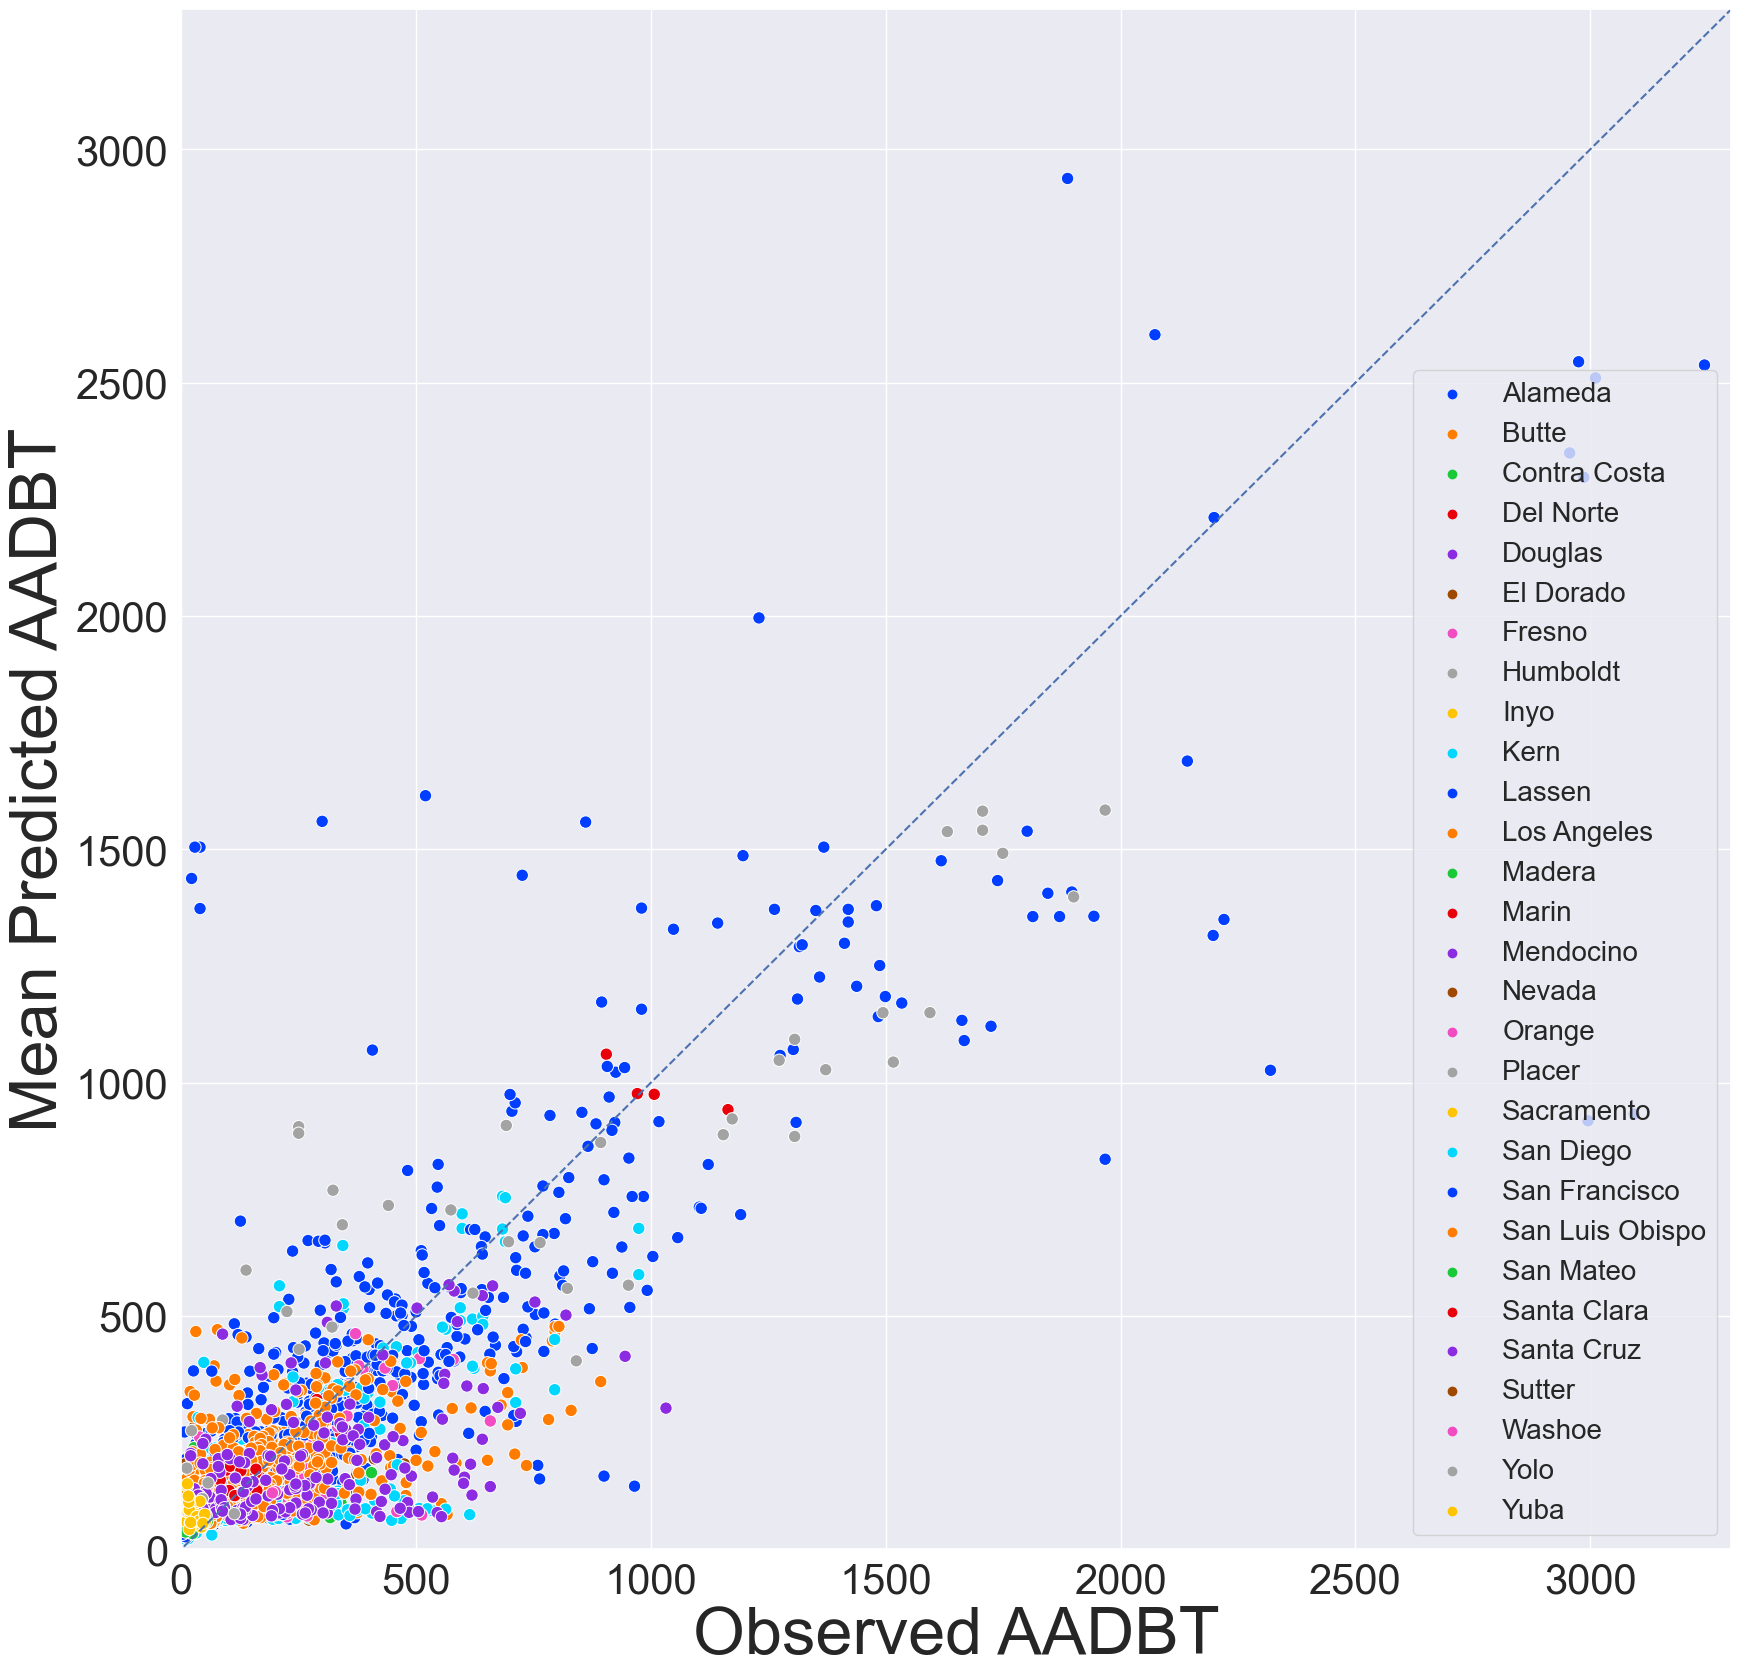

In [811]:
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=graph_data, x="Observed AADB", y="Mean Predicted AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Observed AADBT', ylabel='Mean Predicted AADBT')
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,3300)
plt.ylim(0,3300)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [812]:
importances = list(rf_CV_model.feature_importances_)# List of tuples with variable and importance 
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
feature_importances

[('log_Stv_adb', 0.3294),
 ('pctbiketowork_h', 0.2265),
 ('pctnoveh_t', 0.1866),
 ('Intersection_density5', 0.1018),
 ('exist_bike_parking_q', 0.0465),
 ('urban', 0.0463),
 ('Yolo', 0.0448),
 ('exist_subway_h', 0.0182)]

<AxesSubplot: xlabel='Variable', ylabel='Importance'>

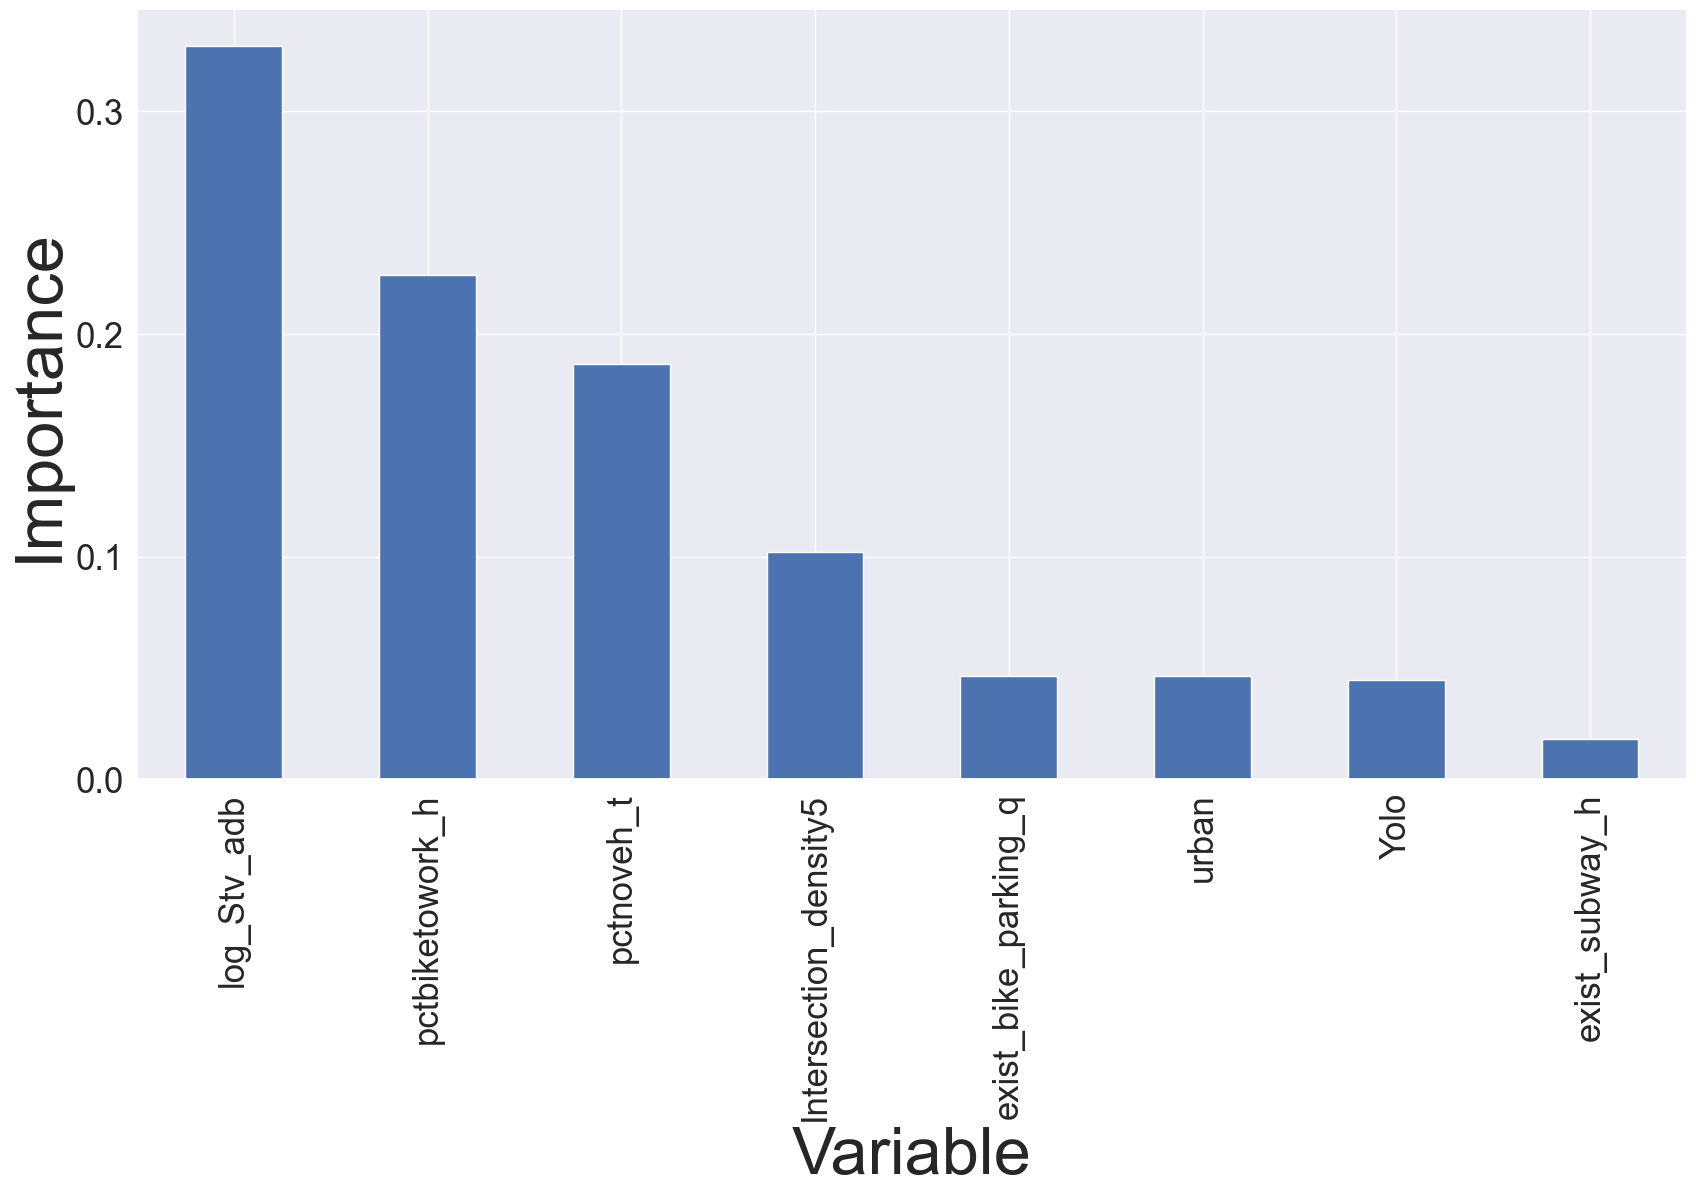

In [813]:
feature_importances_df = pd.DataFrame(rf_CV_model.feature_importances_, index=X_data.columns, columns=[
                                      'Importance']).sort_values('Importance', ascending=False)
feature_importances_df.plot(kind='bar', figsize=(20, 10), style='fivethirtyeight', fontsize=25, legend=False,
                          ylabel="Importance", xlabel="Variable")